In [29]:
import scanpy as sc
import pandas as pd
import pickle
import time
import anndata
import sklearn.metrics
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [13]:
df= pd.read_table("matrix_mixology/sc_10x_5cl.count.csv.gz", compression="gzip", sep=",")
adata = anndata.AnnData(df.T)#.values.T, obs=df.columns, var=df.index)
cell_cycle_genes = [x.strip() for x in open('regressed_genes/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
mito_genes = adata.var_names.str.startswith('MT-') 
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1) 
adata.obs['n_counts'] = adata.X.sum(axis=1)
np.sum(adata[:, mito_genes].X, axis=1)
adata = adata[adata.obs['percent_mito'] < 0.05, :]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.regress_out(adata, ['S_score', 'G2M_score','n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
adata.write('mi_10x/adata_base.h5ad')

Trying to set attribute `.obs` of view, making a copy.


Trying to set attribute `.obs` of view, making a copy.
... storing 'phase' as categorical


In [2]:
adata=sc.read('mi_10x/adata_base.h5ad')

In [29]:
nei=[5,10,20,50,100]
adatone=[]
for x in nei:
    adata=sc.read('mi_10x/adata_base.h5ad')
    sc.pp.neighbors(adata, n_neighbors=x, n_pcs=40)
    adatone.append(adata)
adatone[0].write('mi_10x/adata_5.h5ad')
adatone[1].write('mi_10x/adata_10.h5ad')
adatone[2].write('mi_10x/adata_20.h5ad')
adatone[3].write('mi_10x/adata_50.h5ad')
adatone[4].write('mi_10x/adata_100.h5ad')

In [14]:
adata5=sc.read('mi_10x/adata_5.h5ad')
adata10=sc.read('mi_10x/adata_10.h5ad')
adata20=sc.read('mi_10x/adata_20.h5ad')
adata50=sc.read('mi_10x/adata_50.h5ad')
adata100=sc.read('mi_10x/adata_100.h5ad')

In [3]:
sc.tl.umap(adata5)
sc.tl.umap(adata10) 
sc.tl.umap(adata20) 
sc.tl.umap(adata50)
sc.tl.umap(adata100) 

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


# 1) leiden in range
### 1.1) leiden unweighted

In [4]:
resolutions = np.arange(0, 1, 0.005)

In [5]:
leiden_clusters = pd.DataFrame(index=adata5.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata5, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata5.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_5_unweighted.csv')

In [12]:
leiden_clusters = pd.DataFrame(index=adata10.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata10, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata10.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_10_unweighted.csv')

In [7]:
leiden_clusters = pd.DataFrame(index=adata20.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata20, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata20.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_20_unweighted.csv')

In [8]:
leiden_clusters = pd.DataFrame(index=adata50.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata50, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata50.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_50_unweighted.csv')

In [9]:
leiden_clusters = pd.DataFrame(index=adata100.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata100, resolution=r, use_weights=False)
    leiden_clusters.loc[:, r] = adata100.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_100_unweighted.csv')

In [30]:
unw_leiden_clusters5=pd.read_csv('mi_10x/10x_leiden_clusters_5_unweighted.csv')
unw_leiden_clusters10=pd.read_csv('mi_10x/10x_leiden_clusters_10_unweighted.csv')
unw_leiden_clusters20=pd.read_csv('mi_10x/10x_leiden_clusters_20_unweighted.csv')
unw_leiden_clusters50=pd.read_csv('mi_10x/10x_leiden_clusters_50_unweighted.csv')
unw_leiden_clusters100=pd.read_csv('mi_10x/10x_leiden_clusters_100_unweighted.csv')

### 1.2) leiden weighted

In [21]:
adata5=sc.read('mi_10x/adata_5.h5ad')
adata10=sc.read('mi_10x/adata_10.h5ad')
adata20=sc.read('mi_10x/adata_20.h5ad')
adata50=sc.read('mi_10x/adata_50.h5ad')
adata100=sc.read('mi_10x/adata_100.h5ad')

In [15]:
leiden_clusters = pd.DataFrame(index=adata5.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata5, resolution=r)
    leiden_clusters.loc[:, r] = adata5.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_5_weighted.csv')

In [16]:
leiden_clusters = pd.DataFrame(index=adata10.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata10, resolution=r)
    leiden_clusters.loc[:, r] = adata10.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_10_weighted.csv')

In [17]:
leiden_clusters = pd.DataFrame(index=adata20.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata20, resolution=r)
    leiden_clusters.loc[:, r] = adata20.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_20_weighted.csv')

In [18]:
leiden_clusters = pd.DataFrame(index=adata50.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata50, resolution=r)
    leiden_clusters.loc[:, r] = adata50.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_50_weighted.csv')

In [19]:
leiden_clusters = pd.DataFrame(index=adata100.obs_names, columns=resolutions)
for r in resolutions:
    sc.tl.leiden(adata100, resolution=r)
    leiden_clusters.loc[:, r] = adata100.obs.leiden
leiden_clusters.to_csv('mi_10x/10x_leiden_clusters_100_weighted.csv')

In [31]:
w_leiden_clusters5=pd.read_csv('mi_10x/10x_leiden_clusters_5_weighted.csv')
w_leiden_clusters10=pd.read_csv('mi_10x/10x_leiden_clusters_10_weighted.csv')
w_leiden_clusters20=pd.read_csv('mi_10x/10x_leiden_clusters_20_weighted.csv')
w_leiden_clusters50=pd.read_csv('mi_10x/10x_leiden_clusters_50_weighted.csv')
w_leiden_clusters100=pd.read_csv('mi_10x/10x_leiden_clusters_100_weighted.csv')

# 2) nsbm
### 2.1) nsbm unweighted
# errore con collect marginals, faccio per ora con collect marginals false

In [22]:
adata5=sc.read('mi_10x/adata_5.h5ad')
adata10=sc.read('mi_10x/adata_10.h5ad')
adata20=sc.read('mi_10x/adata_20.h5ad')
adata50=sc.read('mi_10x/adata_50.h5ad')
adata100=sc.read('mi_10x/adata_100.h5ad')

In [6]:
a=time.time()
sc.tl.nsbm(adata5, verbose=True)
b=time.time()

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


IndexError: index 86 is out of bounds for axis 1 with size 83

In [23]:
a=time.time()
sc.tl.nsbm(adata5, collect_marginals=False)
b=time.time()
sc.tl.nsbm(adata10, collect_marginals=False)
c=time.time()
sc.tl.nsbm(adata20, collect_marginals=False)
d=time.time()
sc.tl.nsbm(adata50, collect_marginals=False)
e=time.time()
sc.tl.nsbm(adata100, collect_marginals=False)
f=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
print(aa,bb,cc,dd,ee)
adata5.write('mi_10x/adata_5_unweighted.h5ad')
adata10.write('mi_10x/adata_10_unweighted.h5ad')
adata20.write('mi_10x/adata_20_unweighted.h5ad')
adata50.write('mi_10x/adata_50_unweighted.h5ad')
adata100.write('mi_10x/adata_100_unweighted.h5ad')

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


146.59013557434082 272.9313454627991 231.8405520915985 271.62656807899475 380.42893624305725


In [33]:
unw_adata5=sc.read('mi_10x/adata_5_unweighted.h5ad')
unw_adata10=sc.read('mi_10x/adata_10_unweighted.h5ad')
unw_adata20=sc.read('mi_10x/adata_20_unweighted.h5ad')
unw_adata50=sc.read('mi_10x/adata_50_unweighted.h5ad')
unw_adata100=sc.read('mi_10x/adata_100_unweighted.h5ad')

### 2.2) nsbm weighted

In [25]:
adata5=sc.read('mi_10x/adata_5.h5ad')
adata10=sc.read('mi_10x/adata_10.h5ad')
adata20=sc.read('mi_10x/adata_20.h5ad')
adata50=sc.read('mi_10x/adata_50.h5ad')
adata100=sc.read('mi_10x/adata_100.h5ad')

In [26]:
a=time.time()
sc.tl.nsbm(adata5, collect_marginals=False, use_weights=True)
b=time.time()
sc.tl.nsbm(adata10, collect_marginals=False, use_weights=True)
c=time.time()
sc.tl.nsbm(adata20, collect_marginals=False, use_weights=True)
d=time.time()
sc.tl.nsbm(adata50, collect_marginals=False, use_weights=True)
e=time.time()
sc.tl.nsbm(adata100, collect_marginals=False, use_weights=True)
f=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
print(aa,bb,cc,dd,ee)
adata5.write('mi_10x/adata_5_weighted.h5ad')
adata10.write('mi_10x/adata_10_weighted.h5ad')
adata20.write('mi_10x/adata_20_weighted.h5ad')
adata50.write('mi_10x/adata_50_weighted.h5ad')
adata100.write('mi_10x/adata_100_weighted.h5ad')

1334.4774360656738 797.9564440250397 1271.5926978588104 2298.1119079589844 1677.5450212955475


In [32]:
w_adata5=sc.read('mi_10x/adata_5_weighted.h5ad')
w_adata10=sc.read('mi_10x/adata_10_weighted.h5ad')
w_adata20=sc.read('mi_10x/adata_20_weighted.h5ad')
w_adata50=sc.read('mi_10x/adata_50_weighted.h5ad')
w_adata100=sc.read('mi_10x/adata_100_weighted.h5ad')

# Representation
### unweighted nsbm

<IPython.core.display.Javascript object>


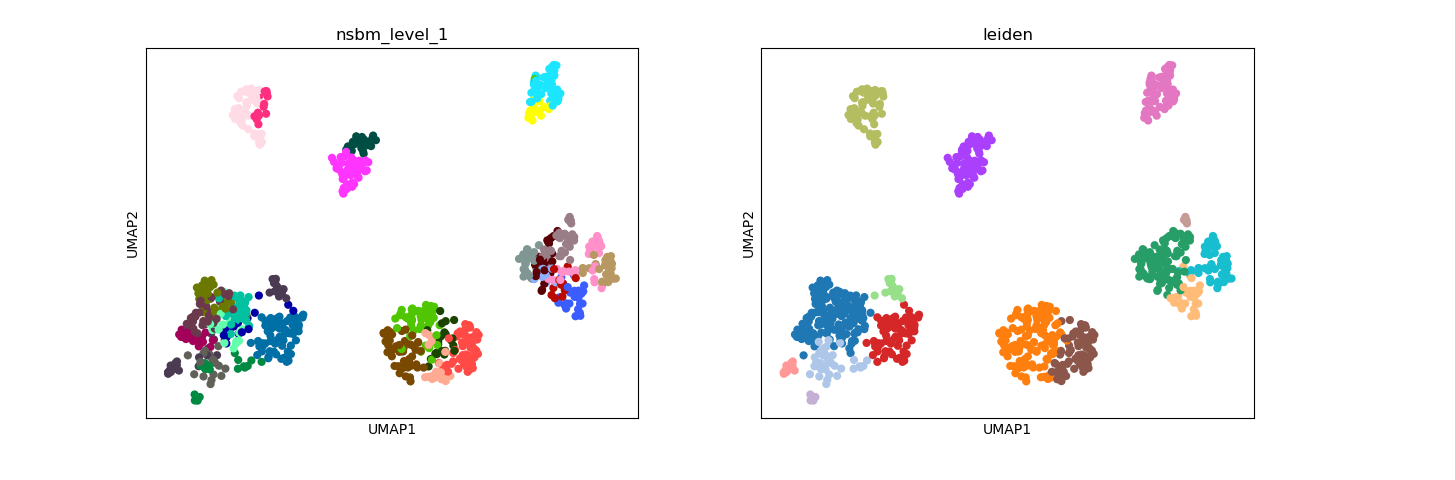

<IPython.core.display.Javascript object>


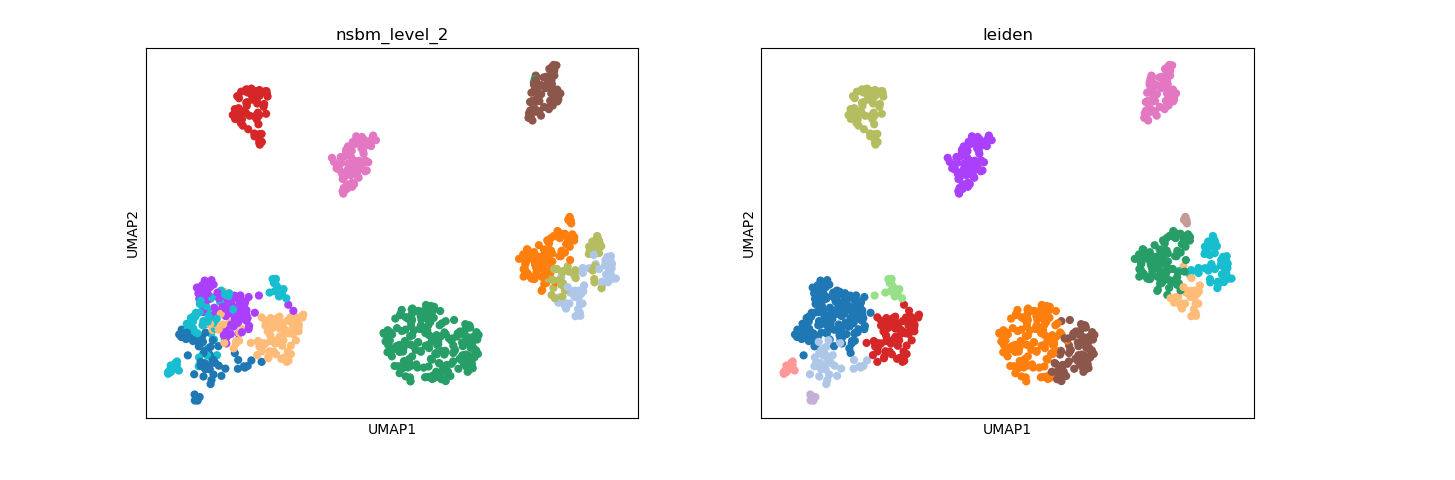

<IPython.core.display.Javascript object>


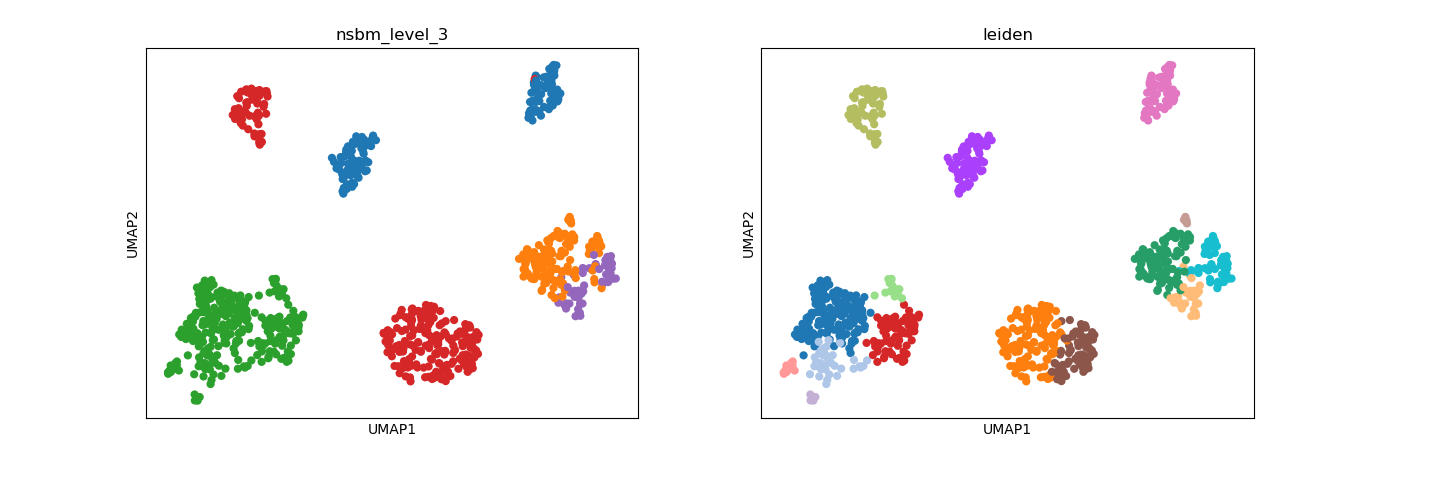

<IPython.core.display.Javascript object>


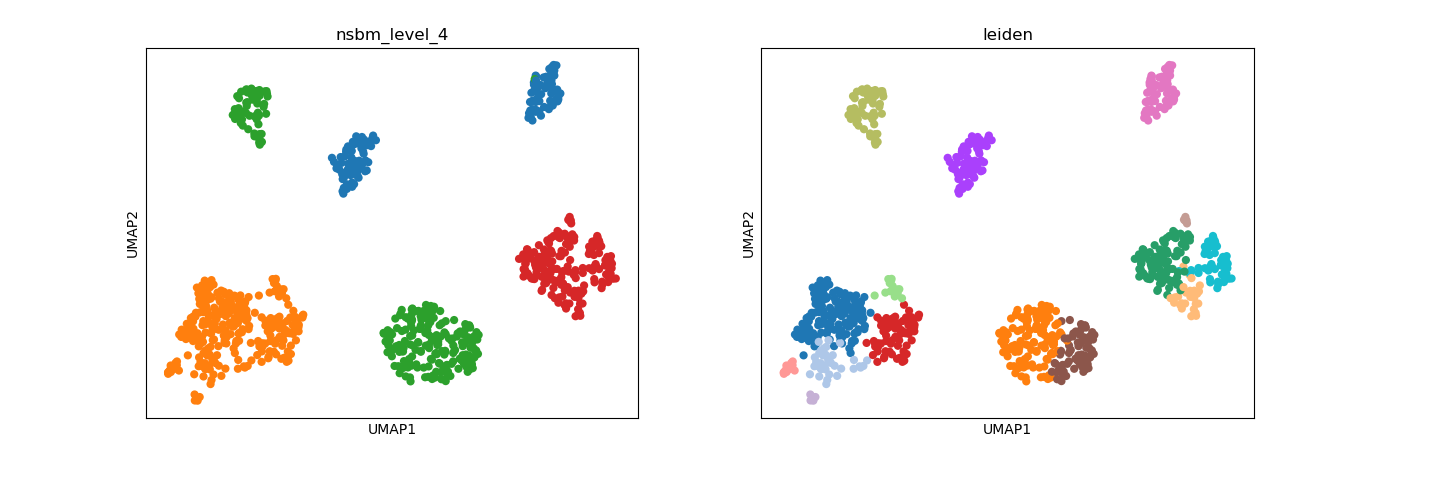

In [47]:
sc.tl.leiden(unw_adata5)
sc.pl.umap(unw_adata5, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata5, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')


<IPython.core.display.Javascript object>


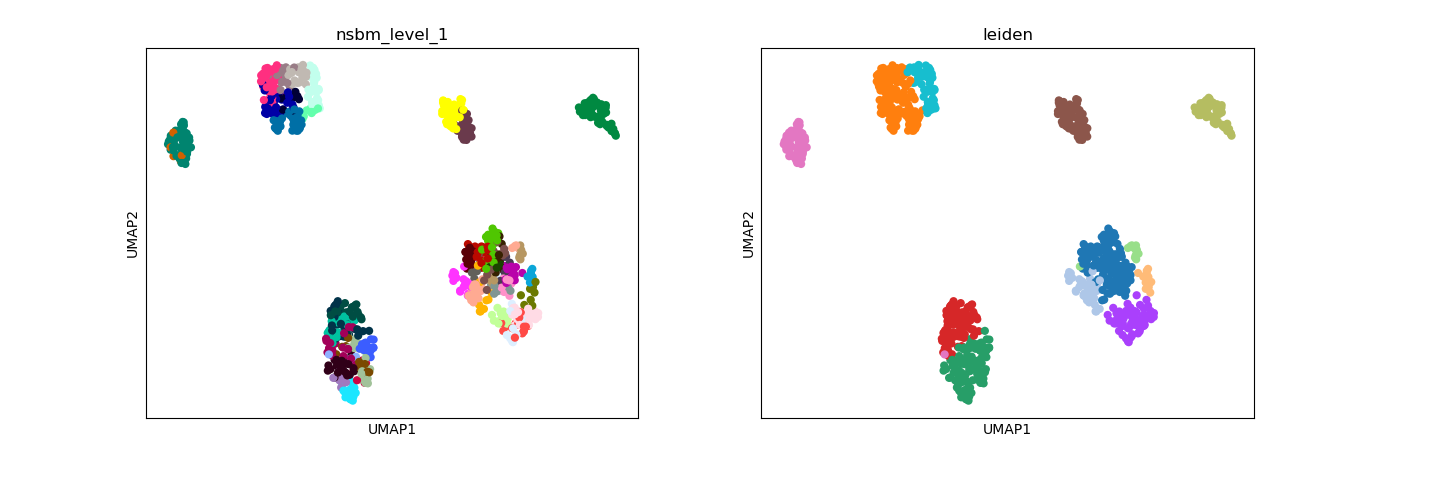

<IPython.core.display.Javascript object>


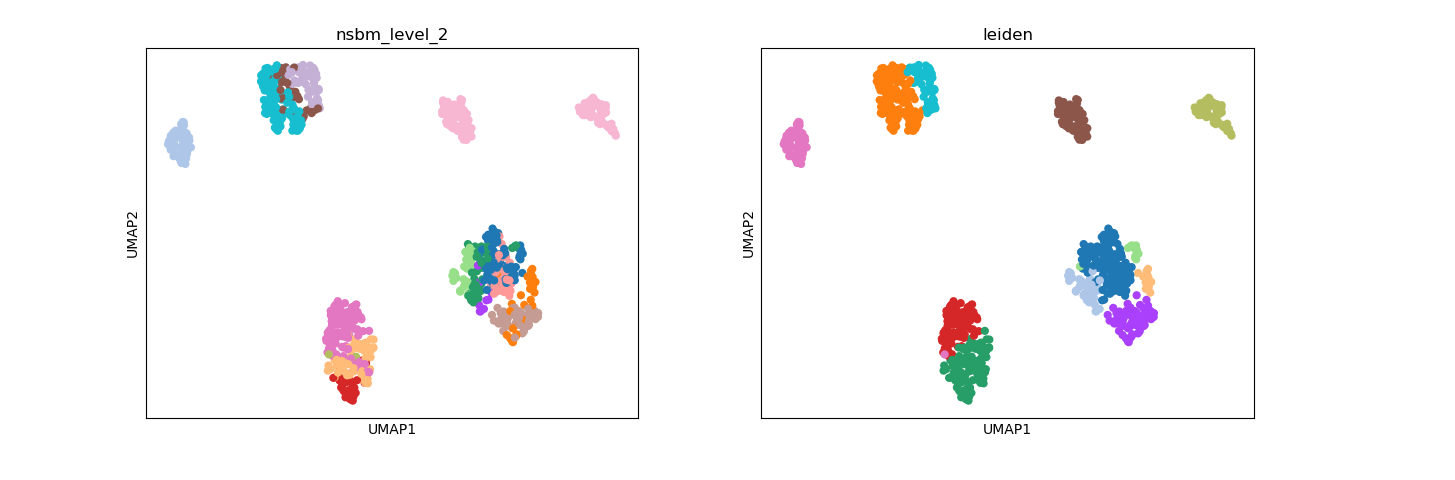

<IPython.core.display.Javascript object>


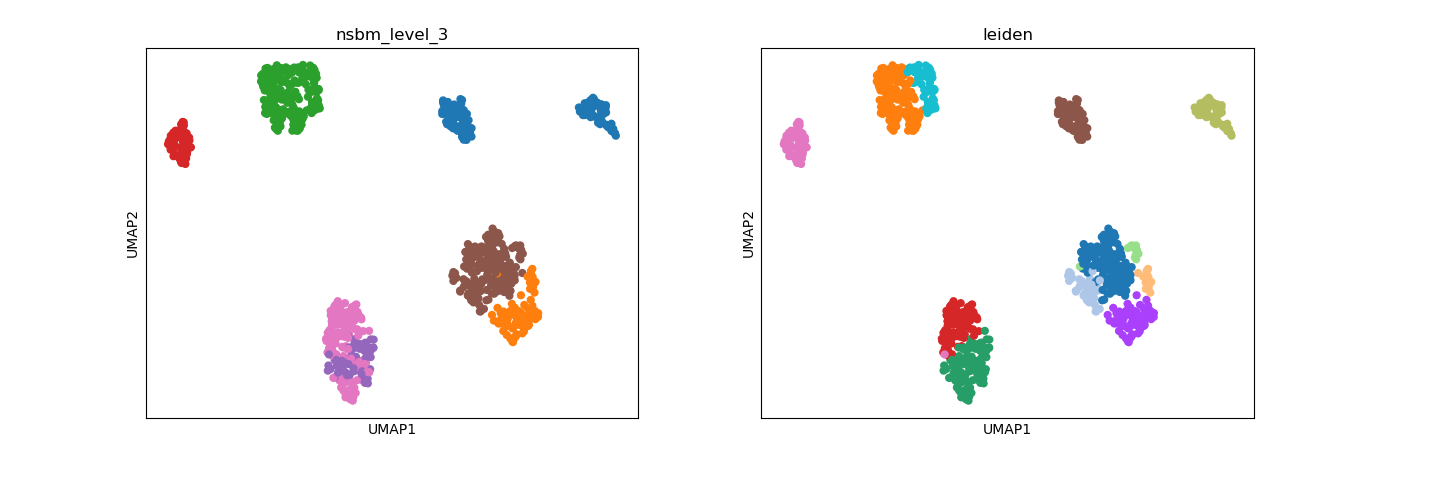

<IPython.core.display.Javascript object>


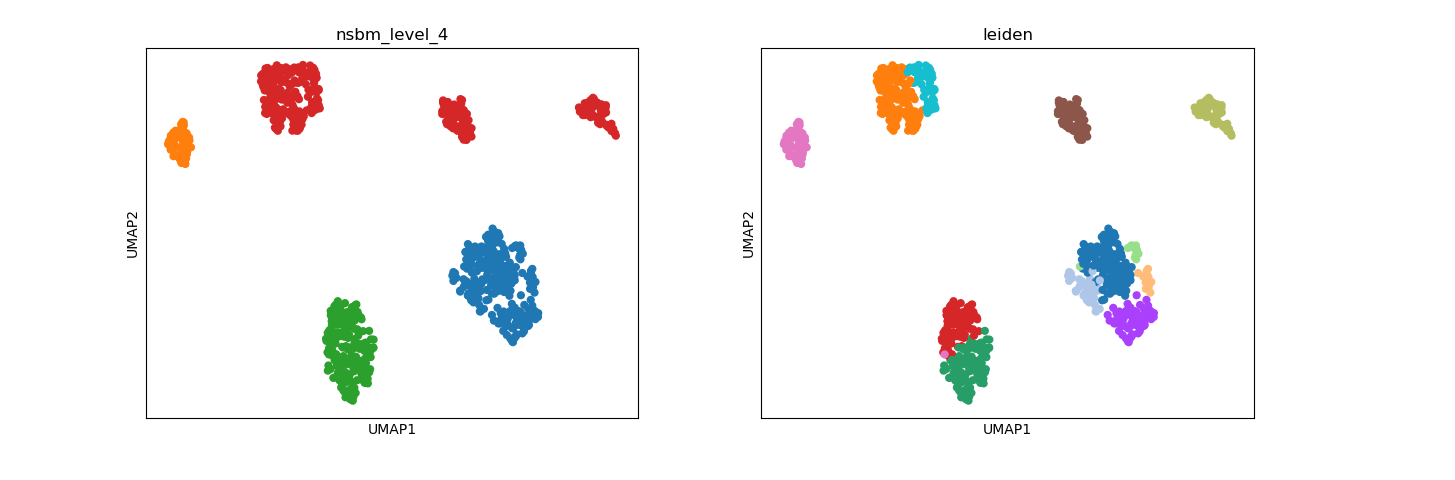

In [46]:
sc.tl.leiden(unw_adata10)
sc.pl.umap(unw_adata10, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata10, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


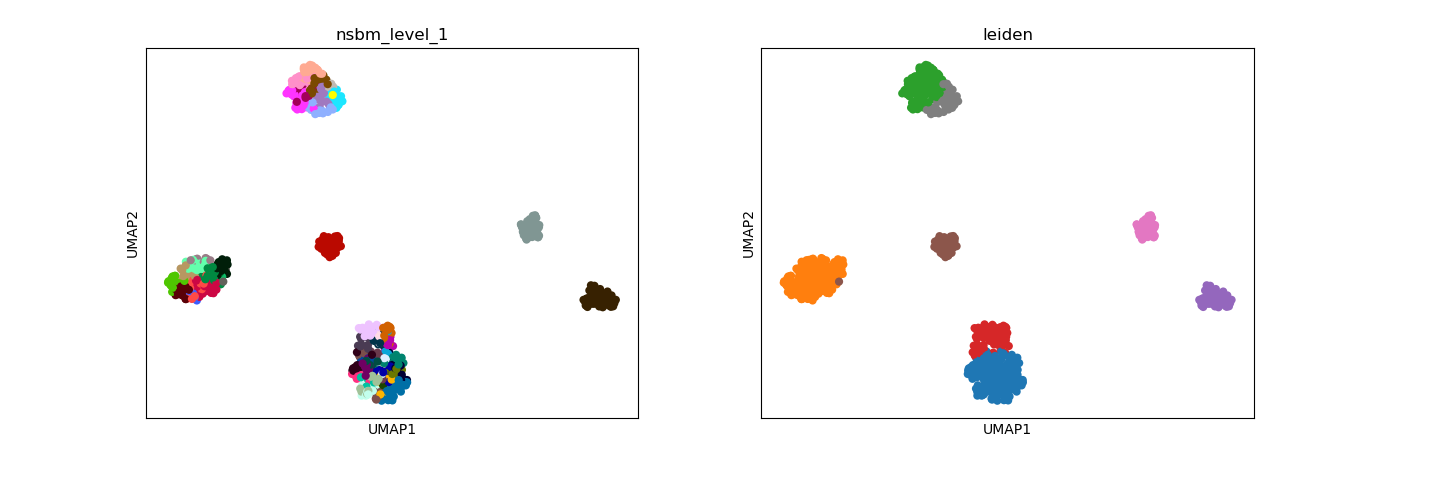

<IPython.core.display.Javascript object>


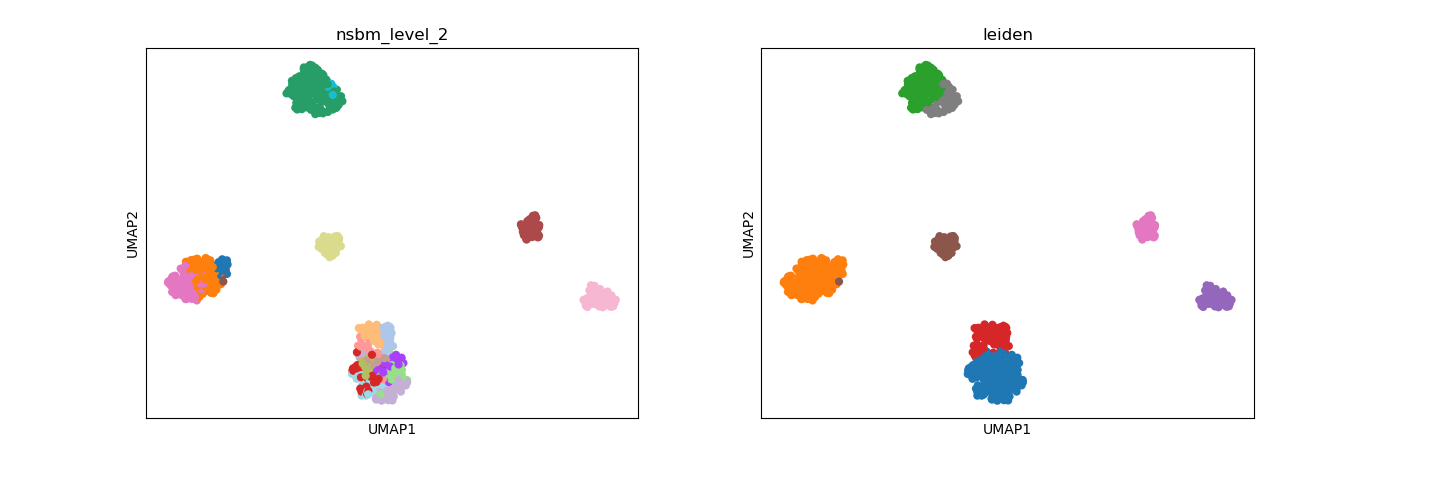

<IPython.core.display.Javascript object>


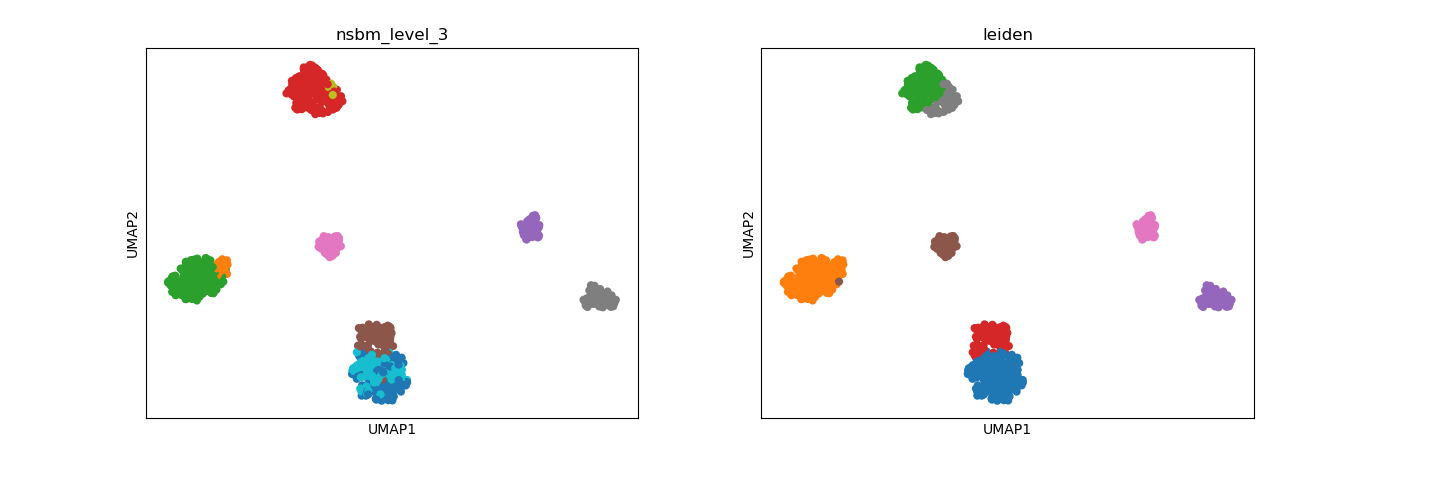

<IPython.core.display.Javascript object>


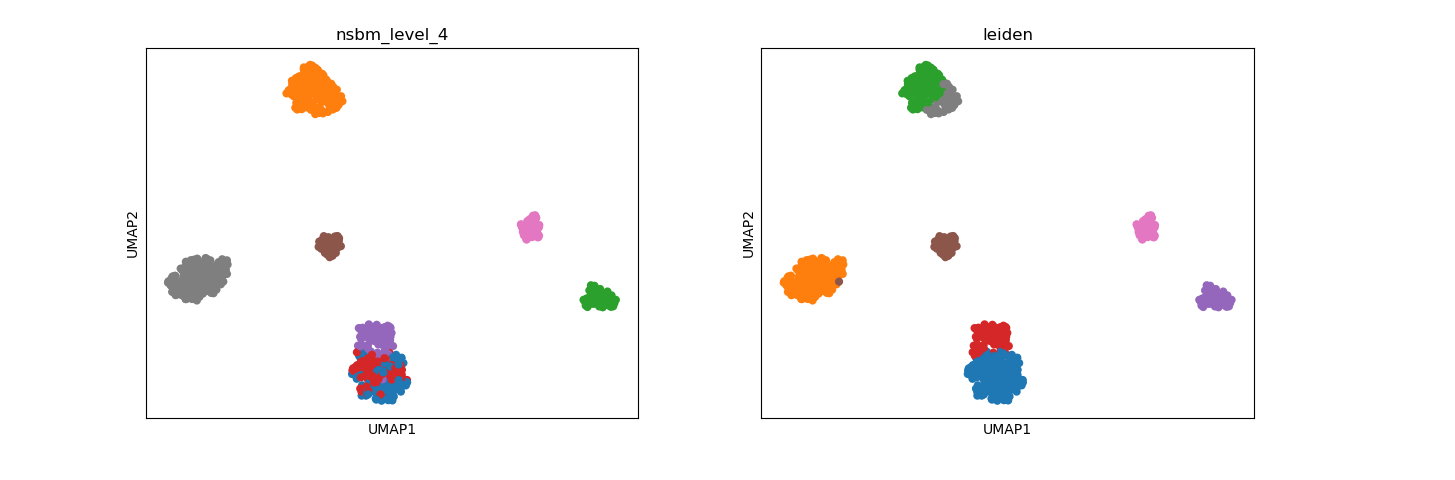

<IPython.core.display.Javascript object>


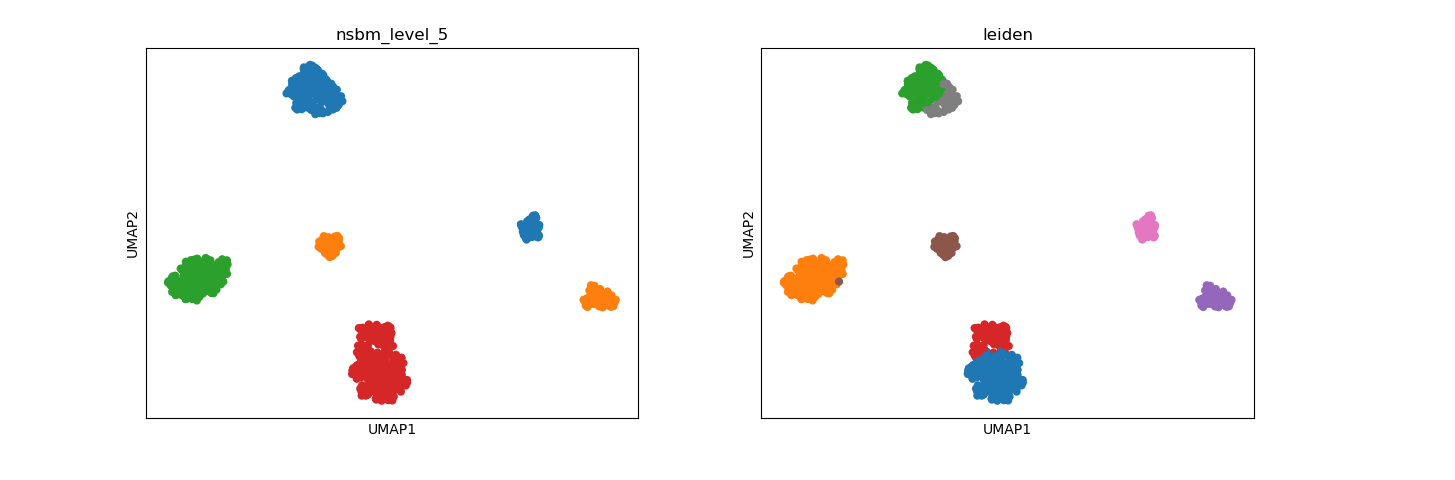

<IPython.core.display.Javascript object>


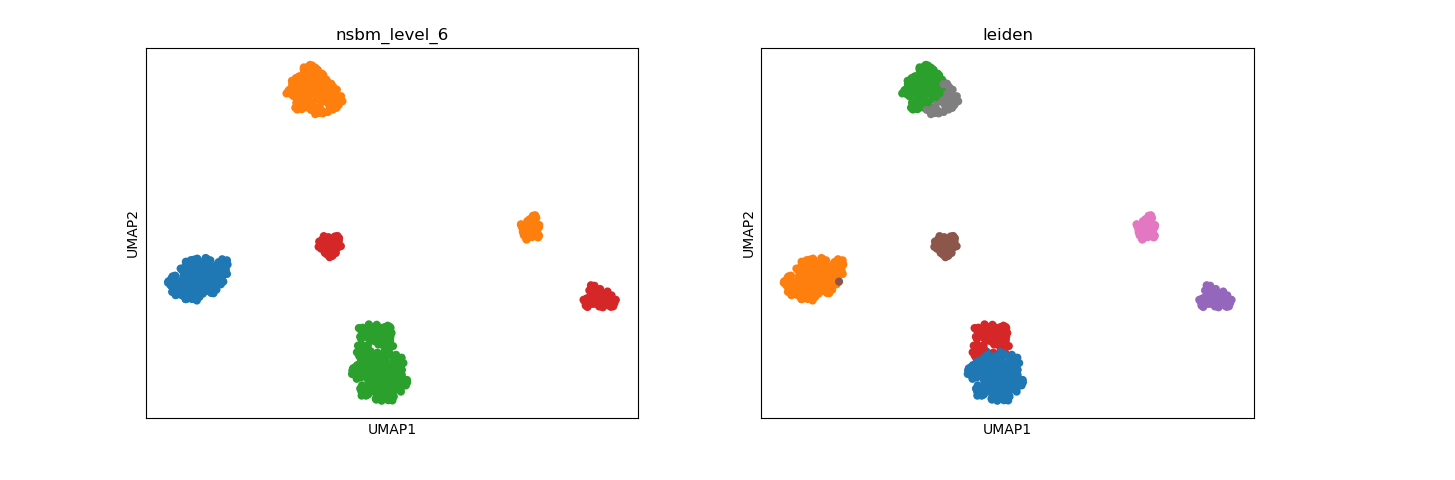

In [49]:
sc.tl.leiden(unw_adata20)
sc.pl.umap(unw_adata20, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata20, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


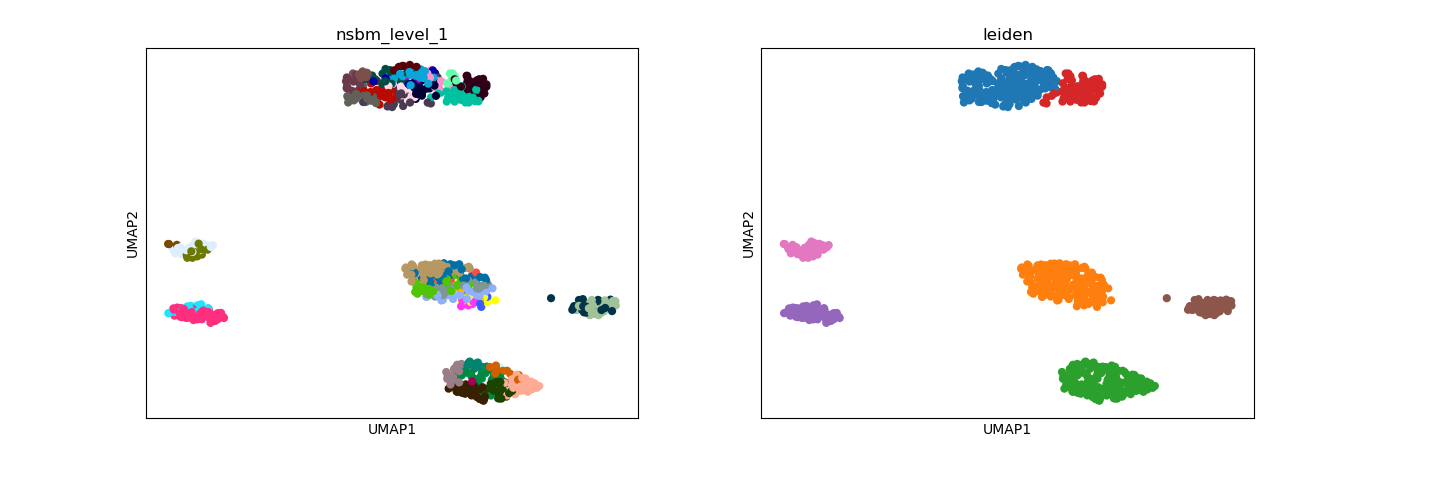

<IPython.core.display.Javascript object>


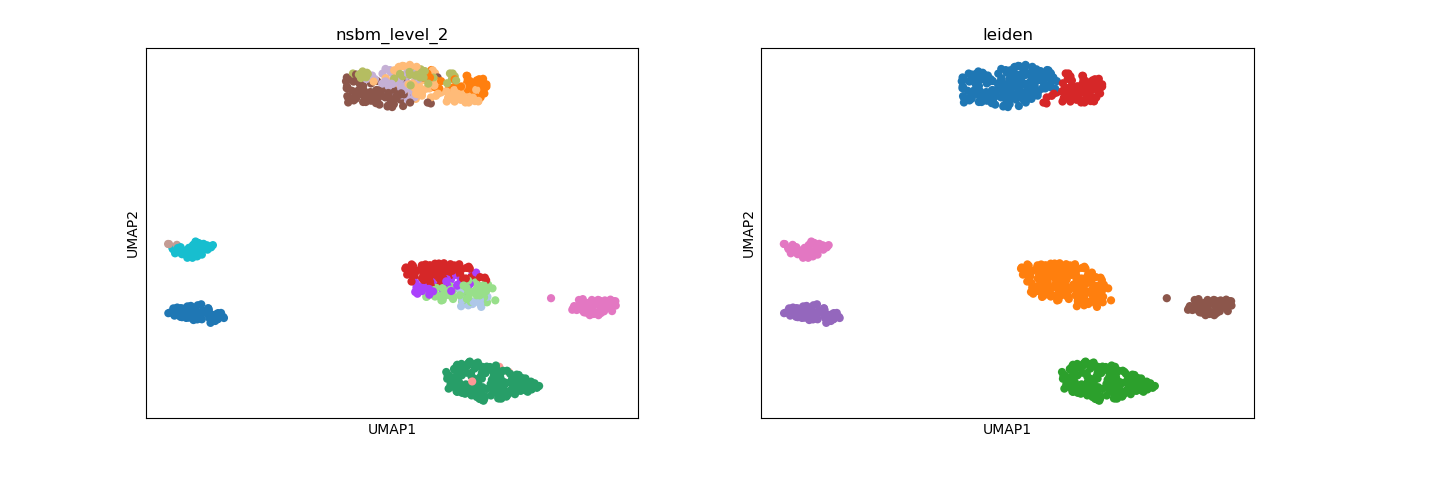

<IPython.core.display.Javascript object>


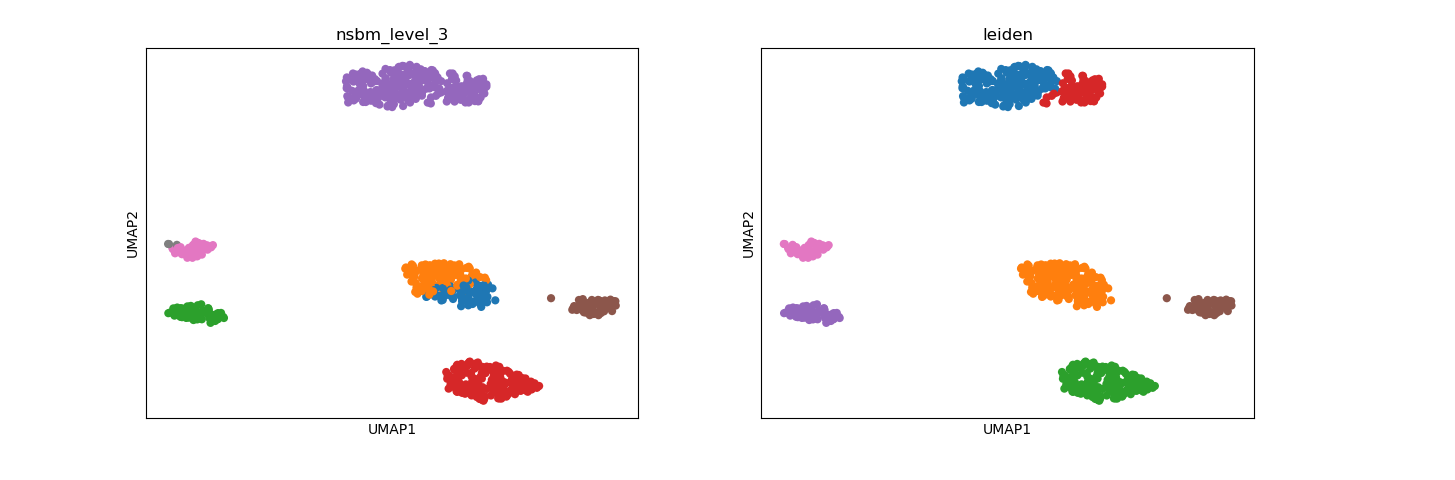

<IPython.core.display.Javascript object>


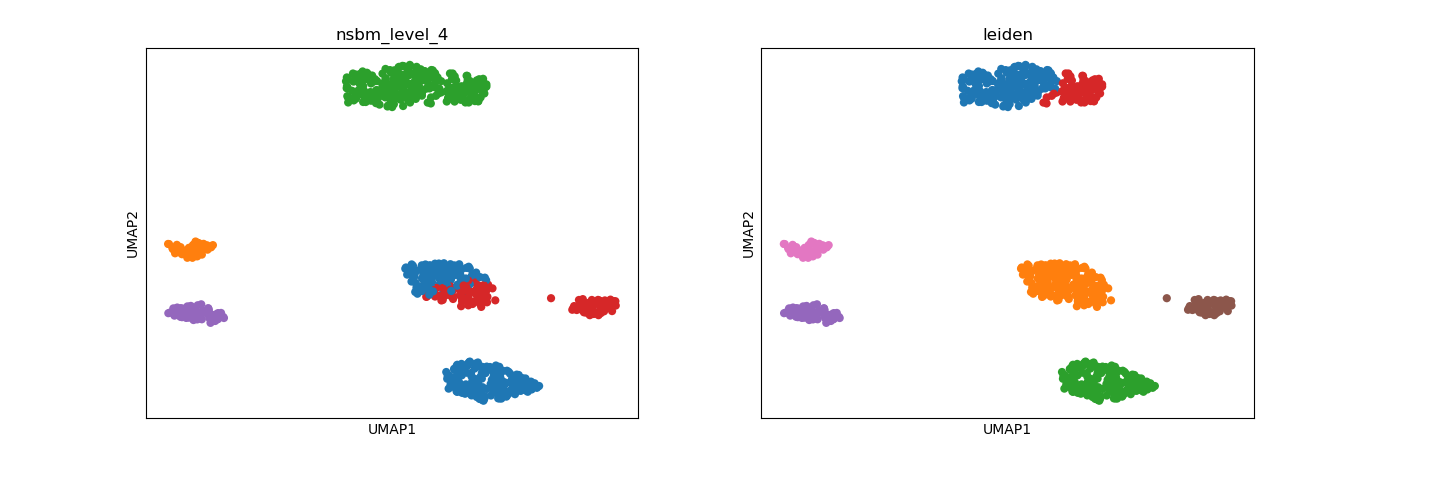

<IPython.core.display.Javascript object>


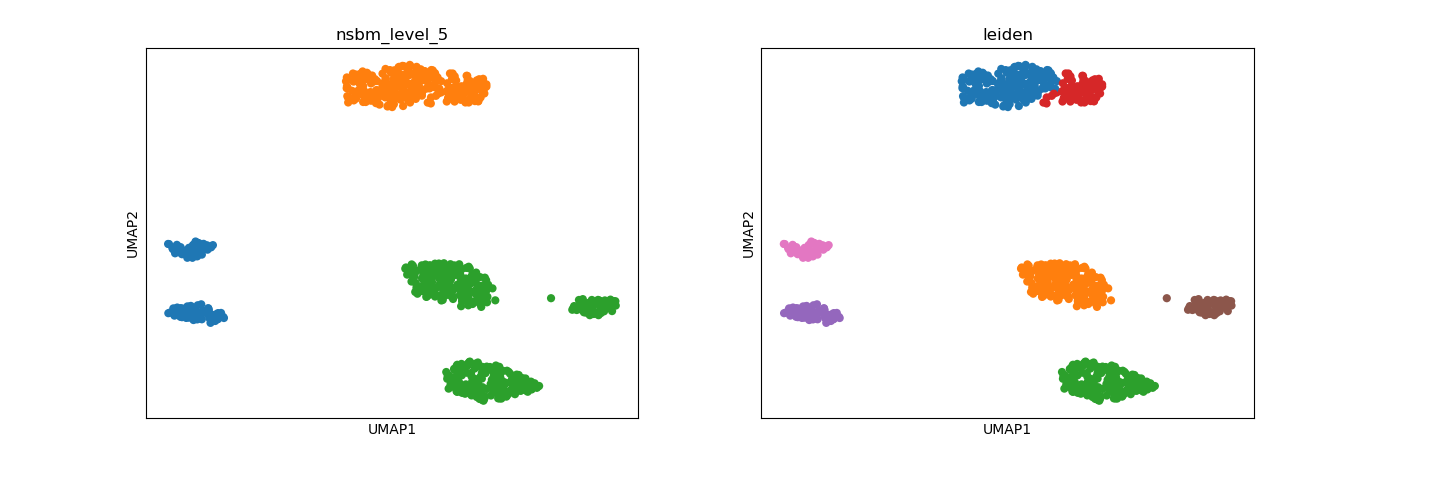

<IPython.core.display.Javascript object>


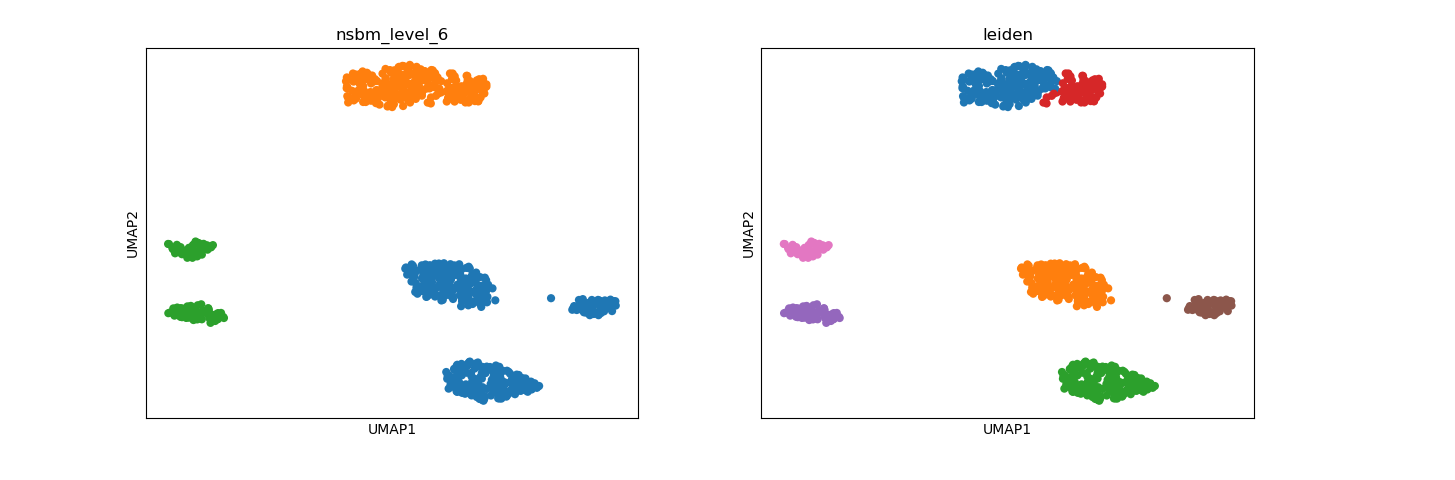

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


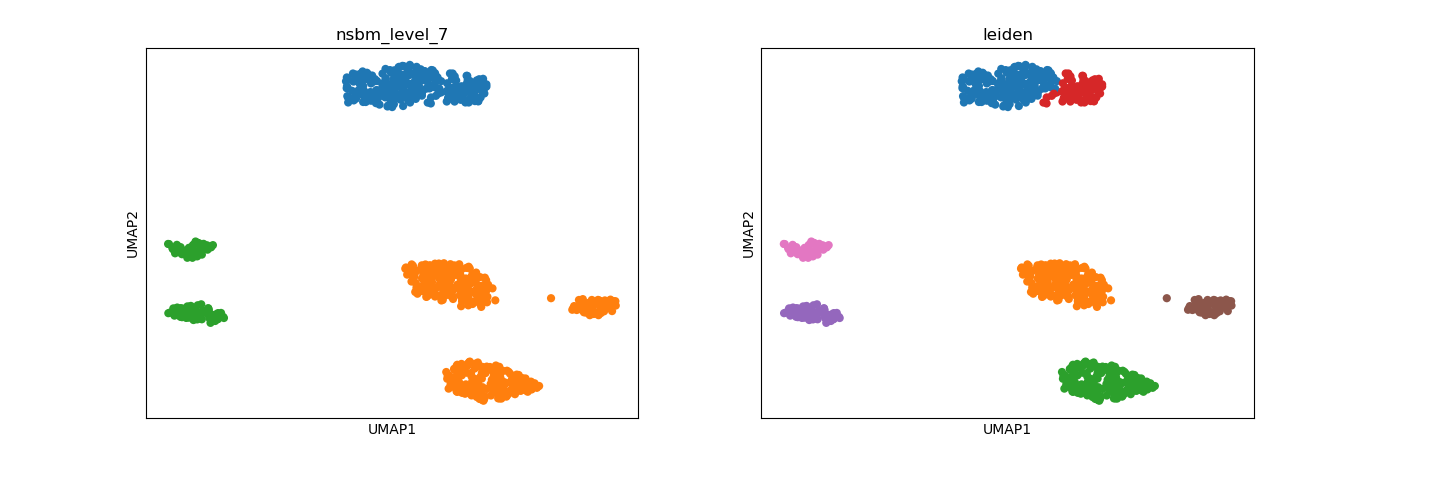

<IPython.core.display.Javascript object>


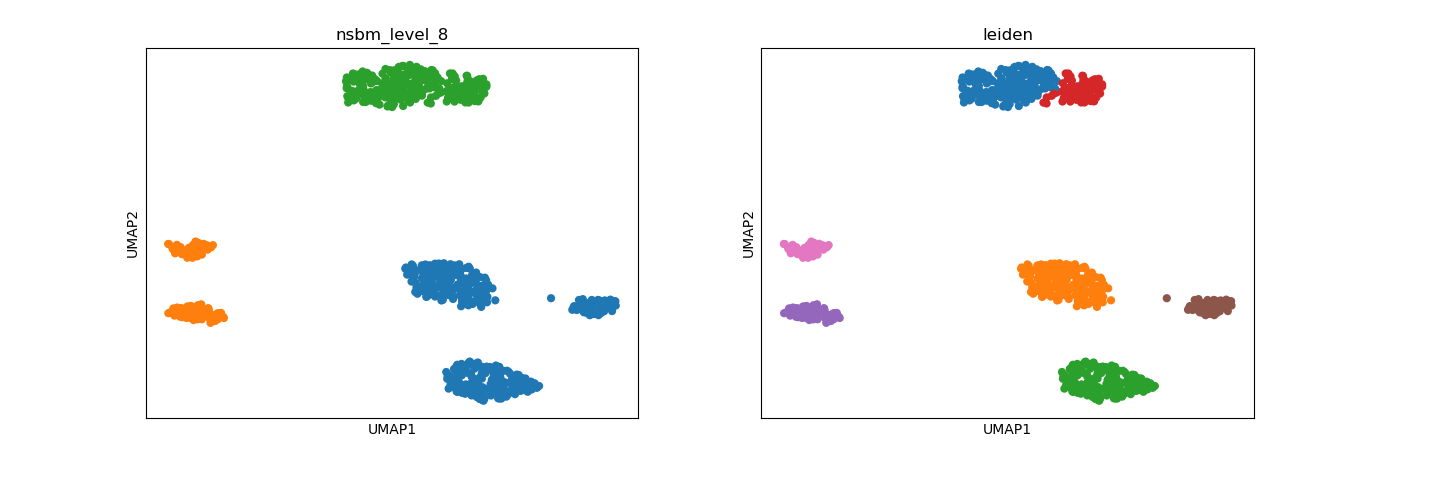

<IPython.core.display.Javascript object>


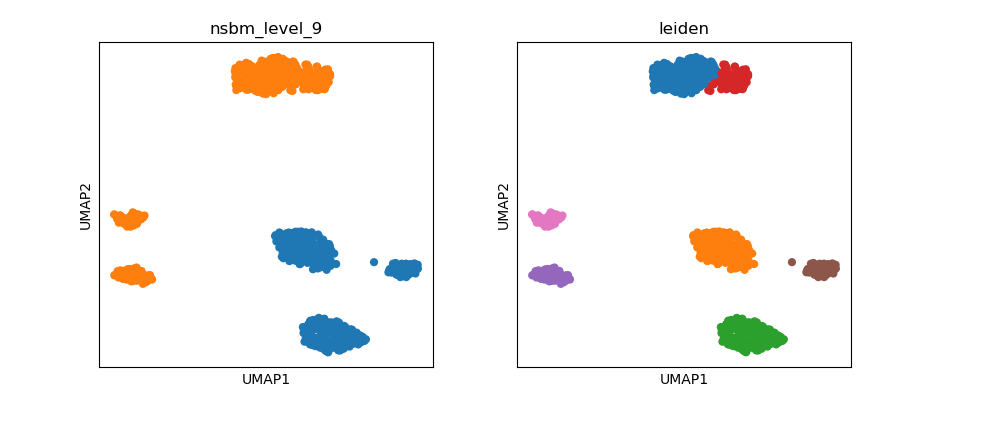

In [50]:
sc.tl.leiden(unw_adata50)
sc.pl.umap(unw_adata50, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata50, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


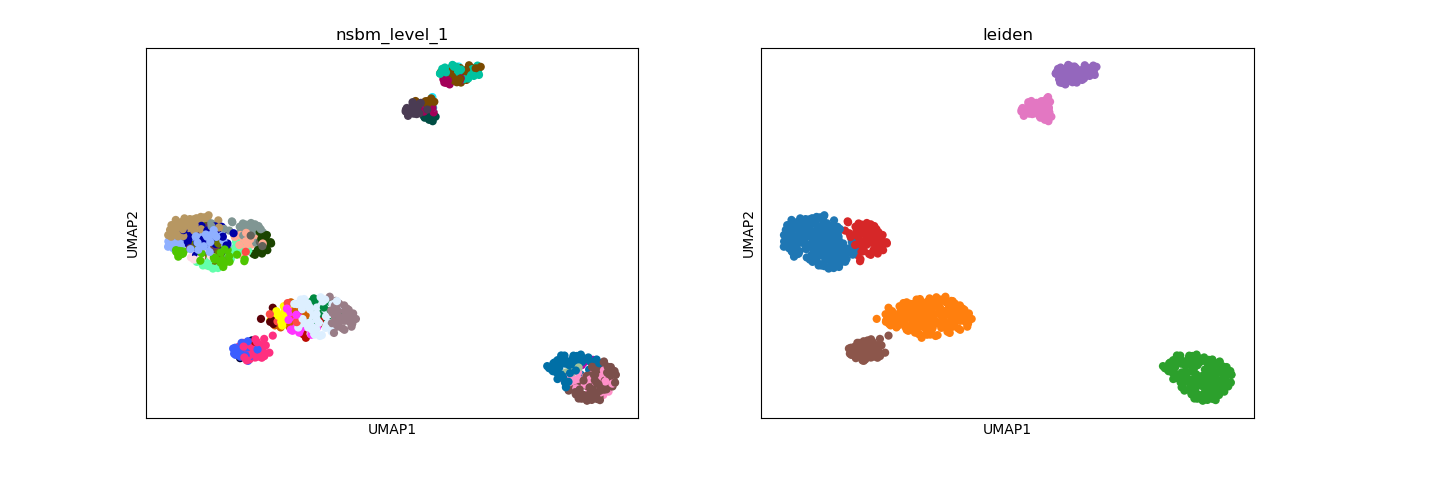

<IPython.core.display.Javascript object>


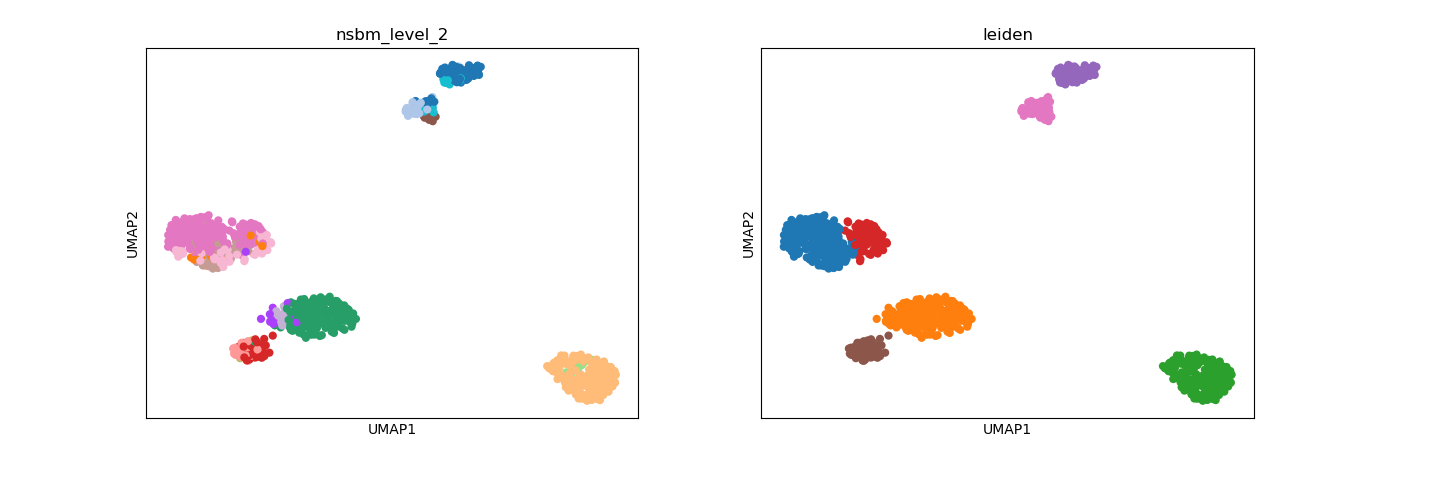

<IPython.core.display.Javascript object>


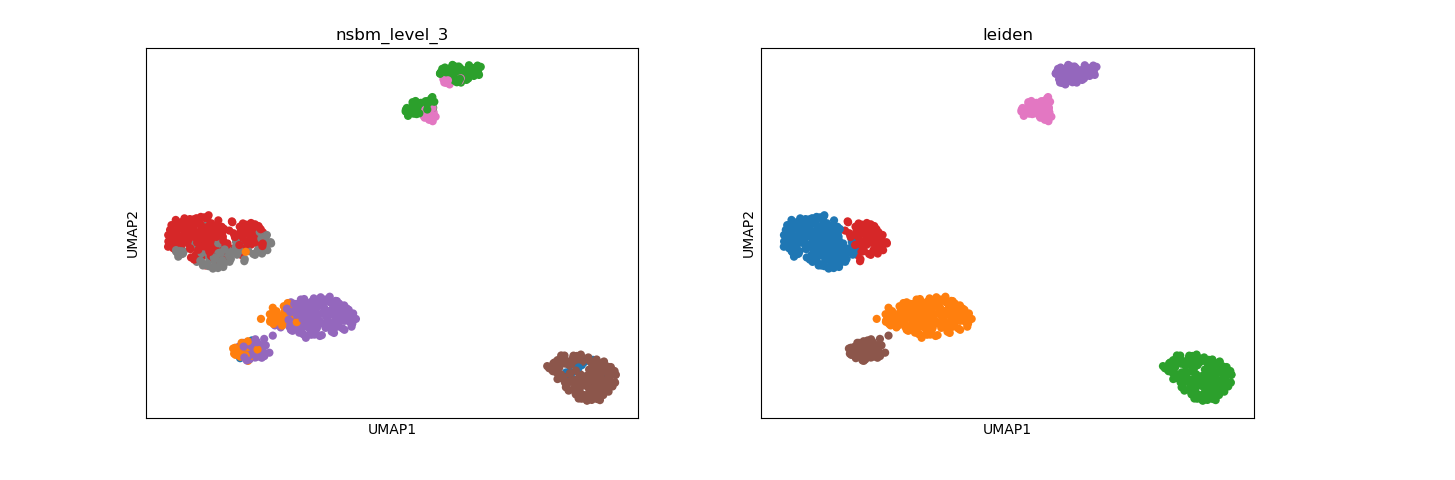

<IPython.core.display.Javascript object>


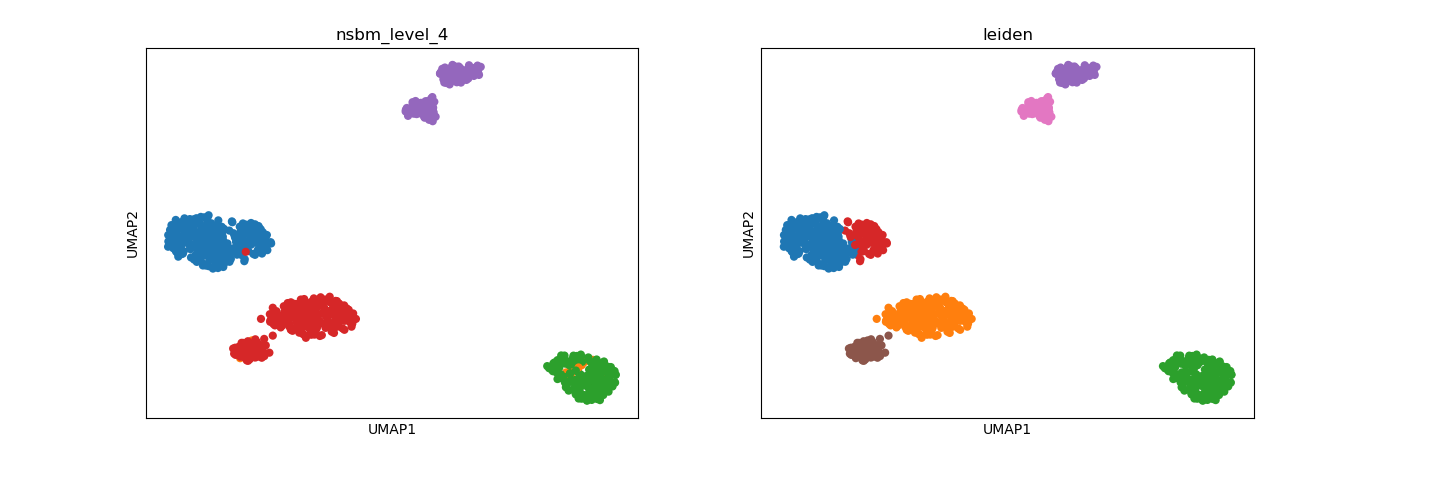

<IPython.core.display.Javascript object>


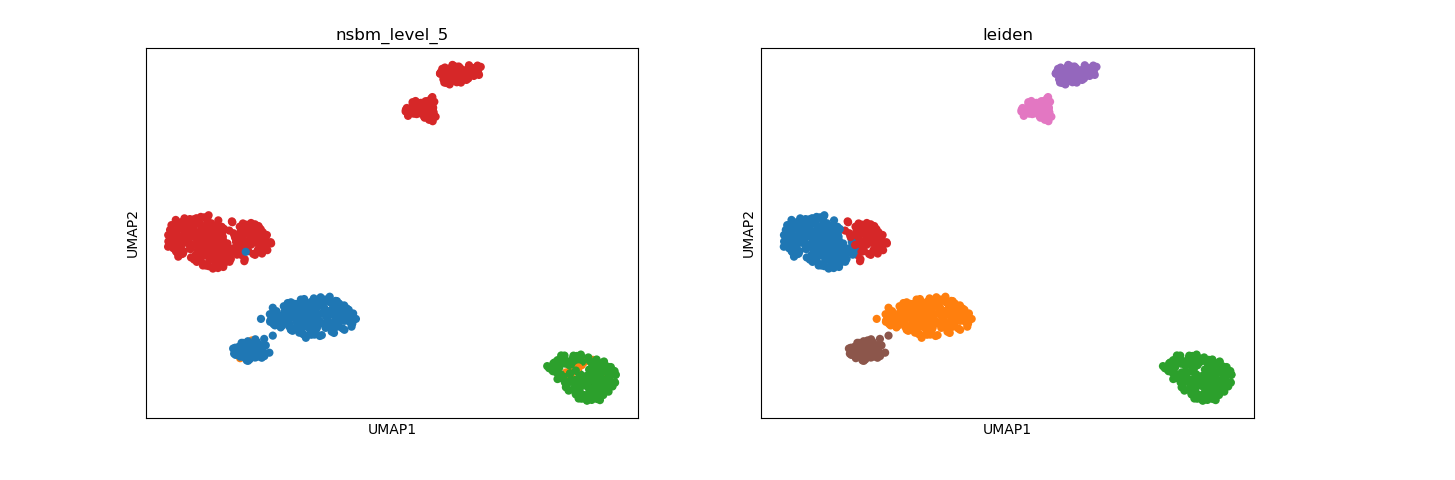

<IPython.core.display.Javascript object>


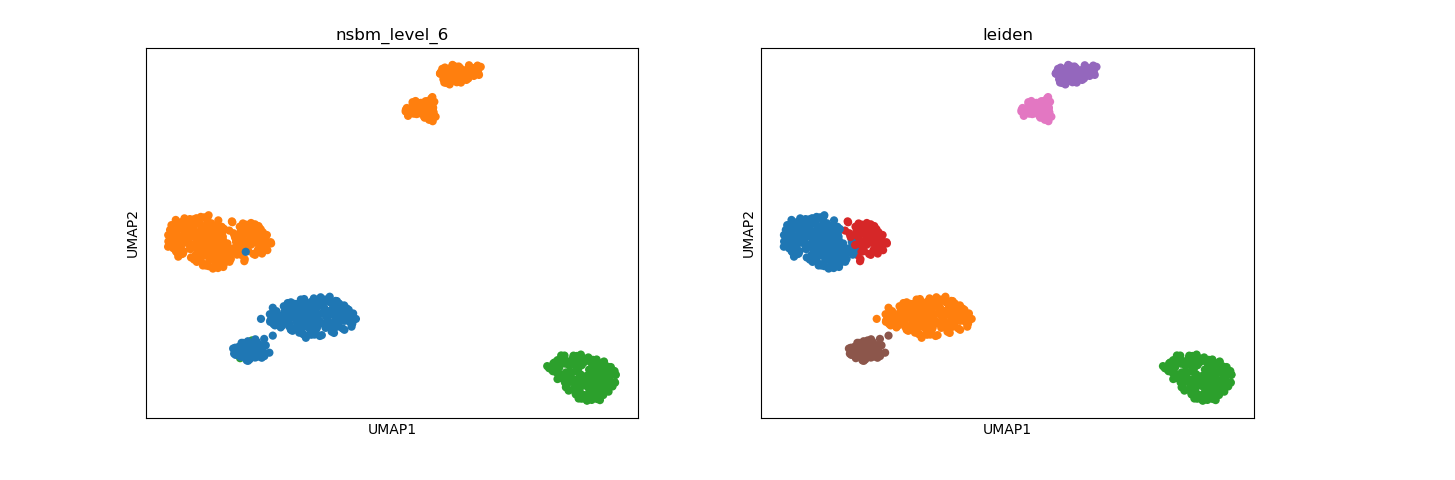

<IPython.core.display.Javascript object>


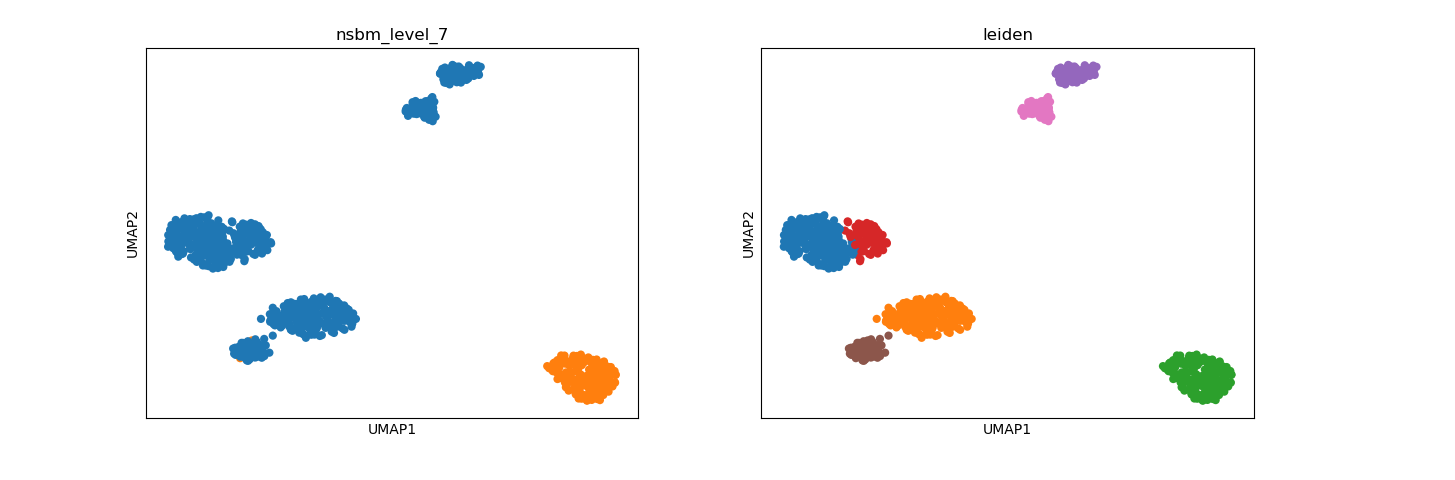

<IPython.core.display.Javascript object>


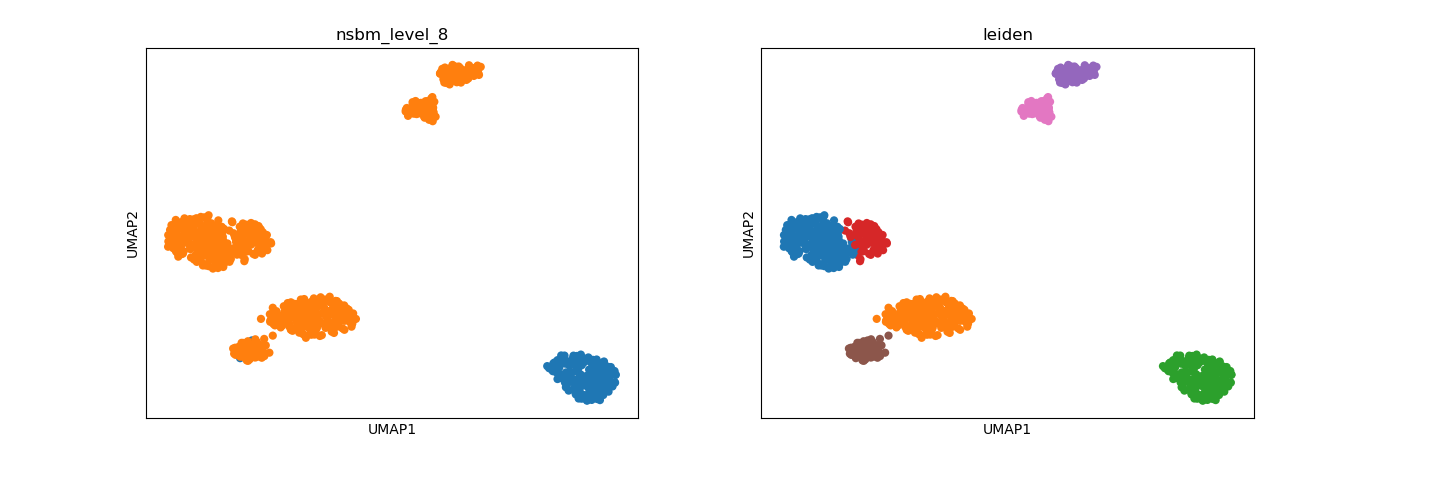

<IPython.core.display.Javascript object>


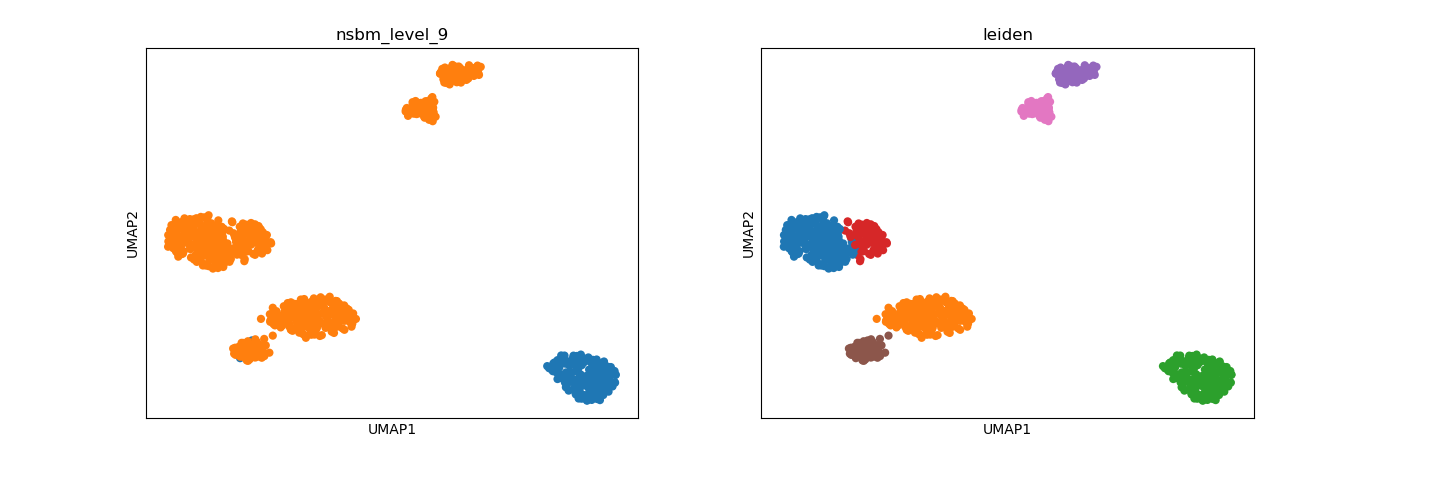

In [51]:
sc.tl.leiden(unw_adata100)
sc.pl.umap(unw_adata100, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(unw_adata100, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

### nsbm weighted

<IPython.core.display.Javascript object>


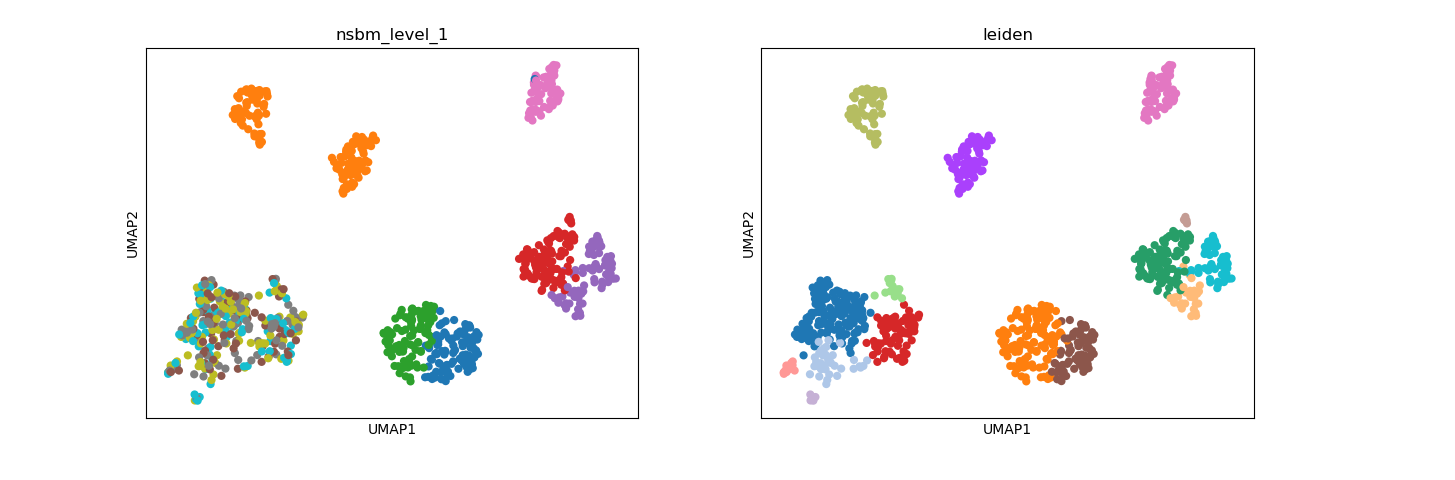

<IPython.core.display.Javascript object>


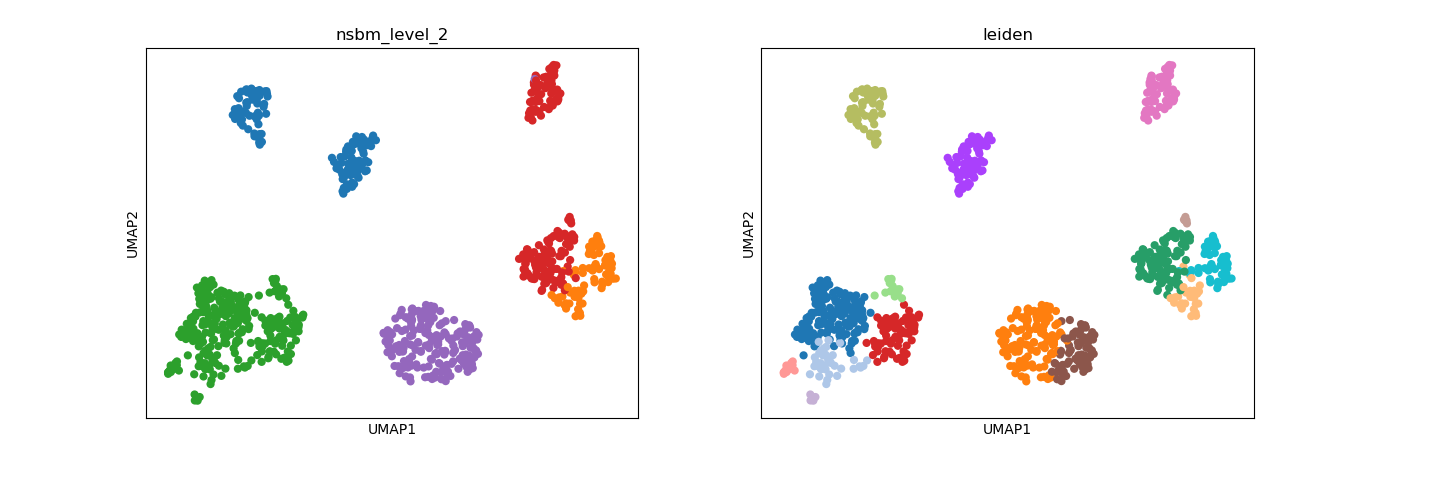

<IPython.core.display.Javascript object>


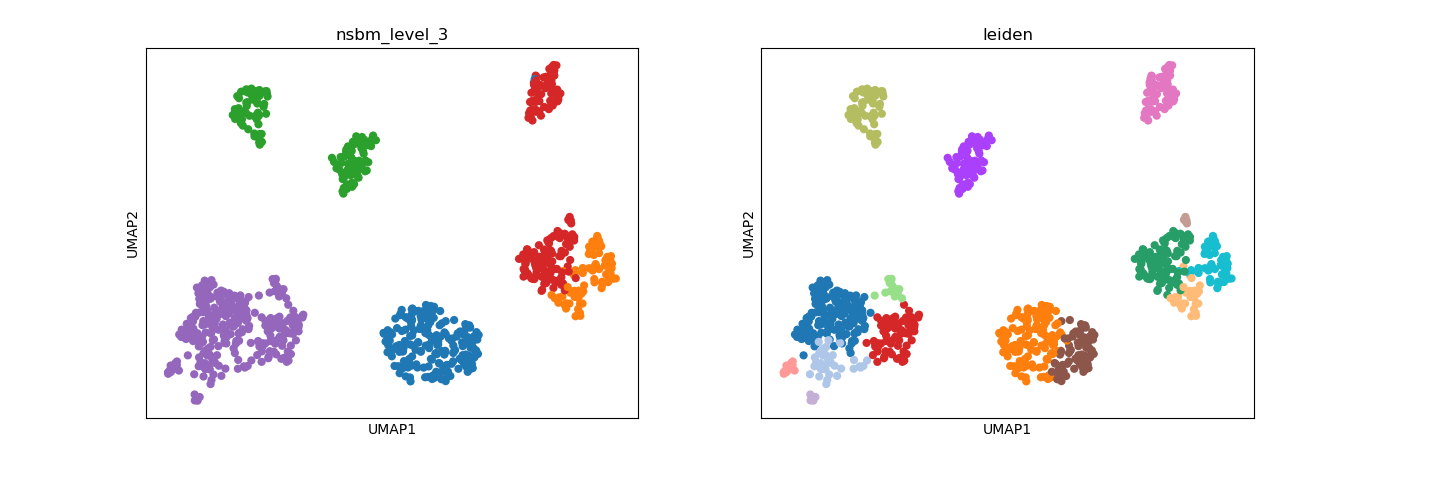

<IPython.core.display.Javascript object>


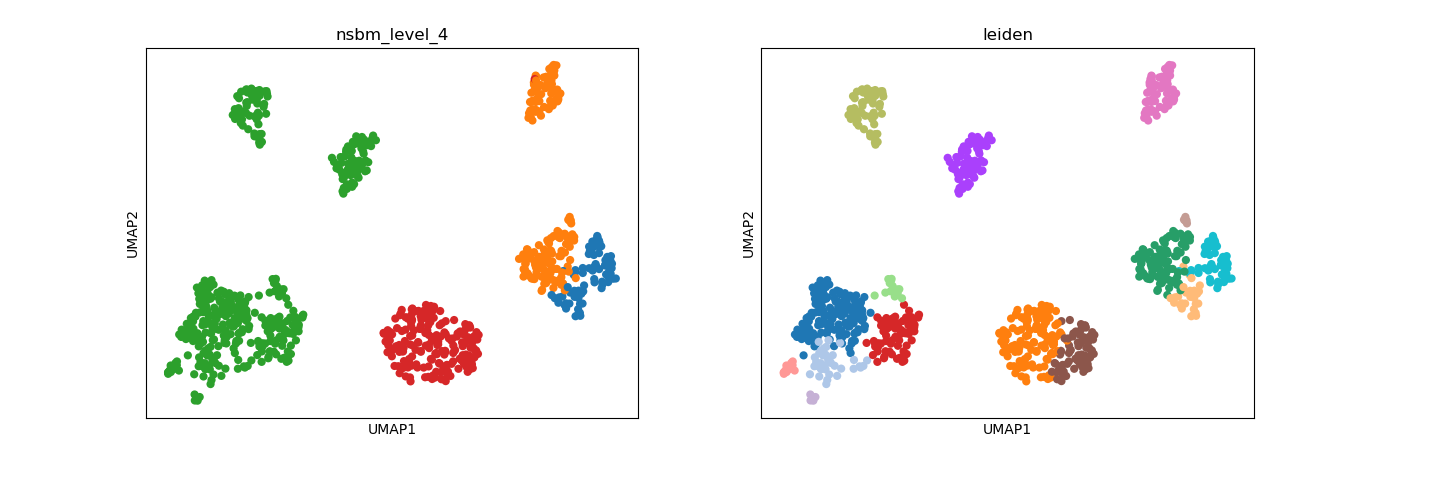

<IPython.core.display.Javascript object>


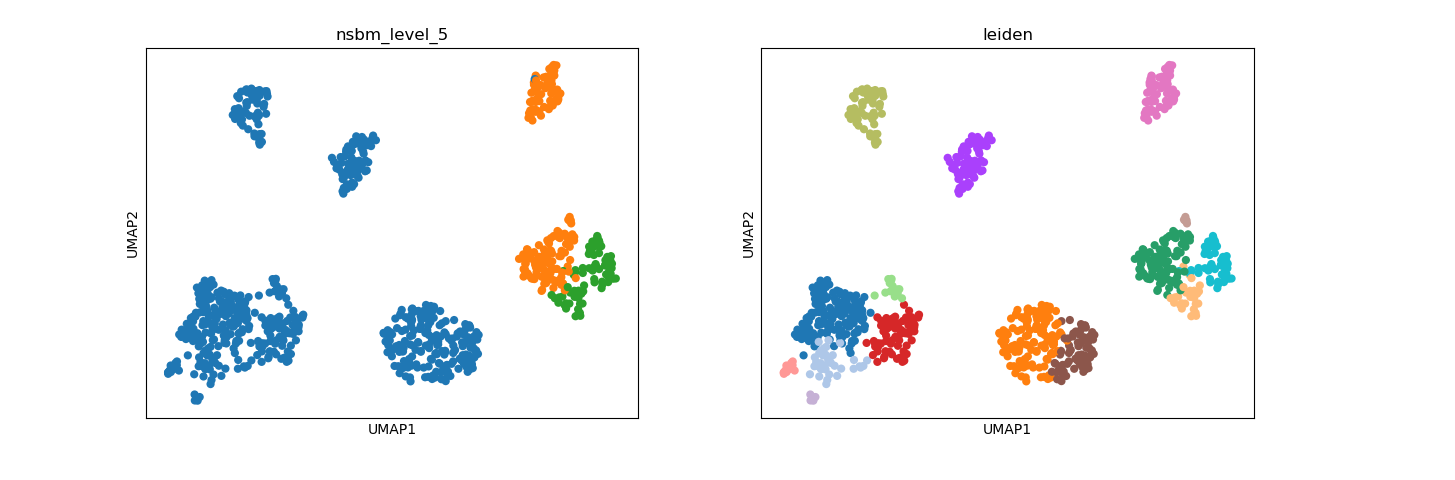

<IPython.core.display.Javascript object>


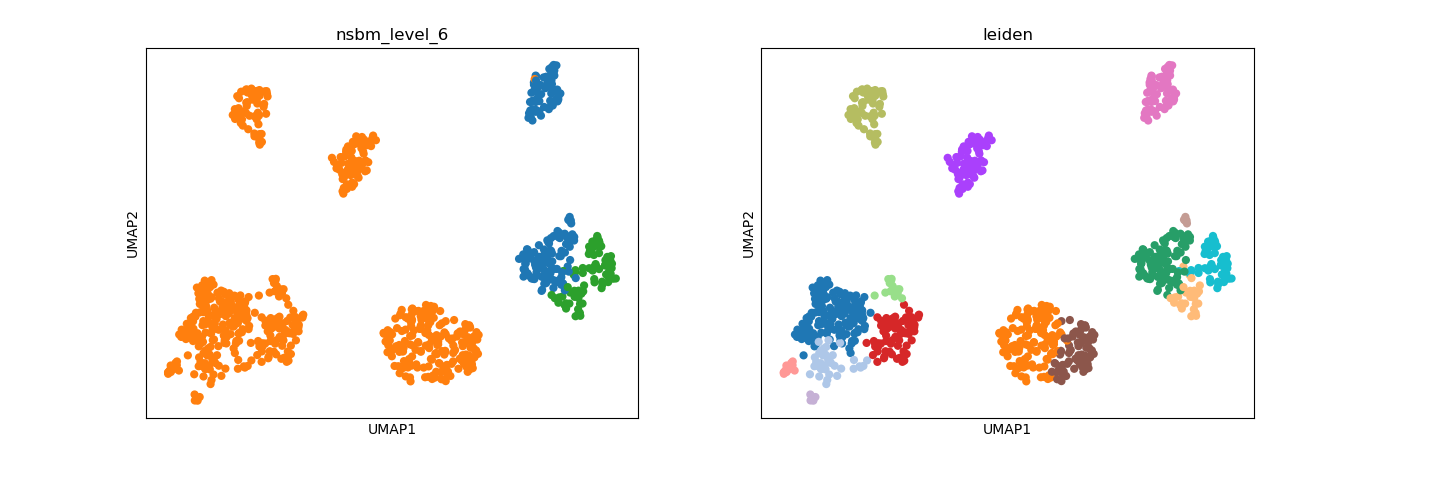

<IPython.core.display.Javascript object>


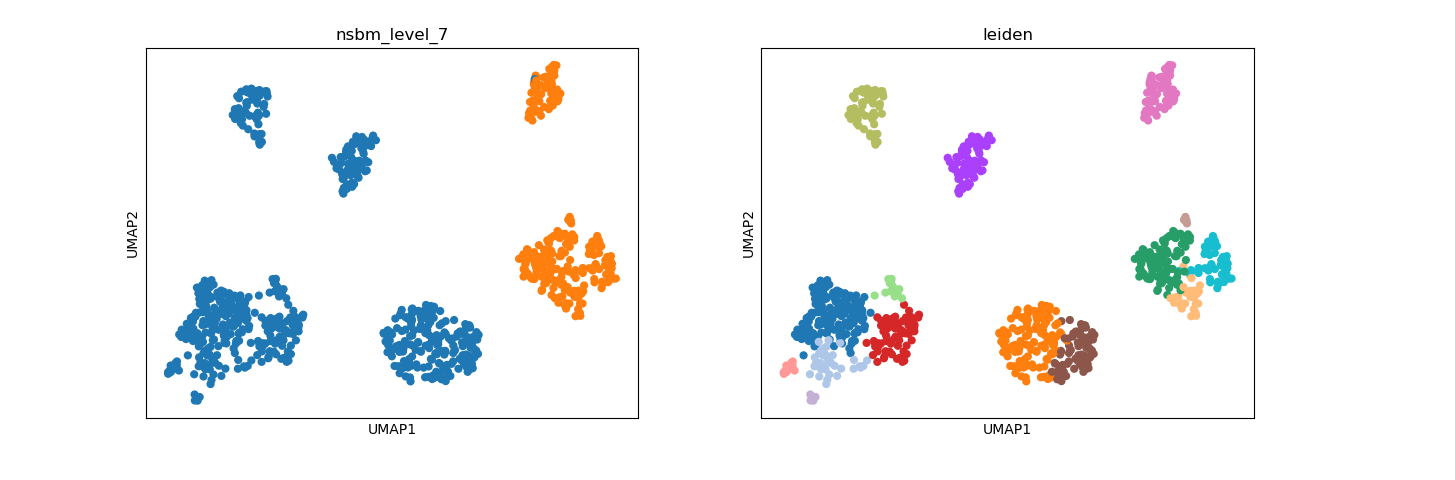

<IPython.core.display.Javascript object>


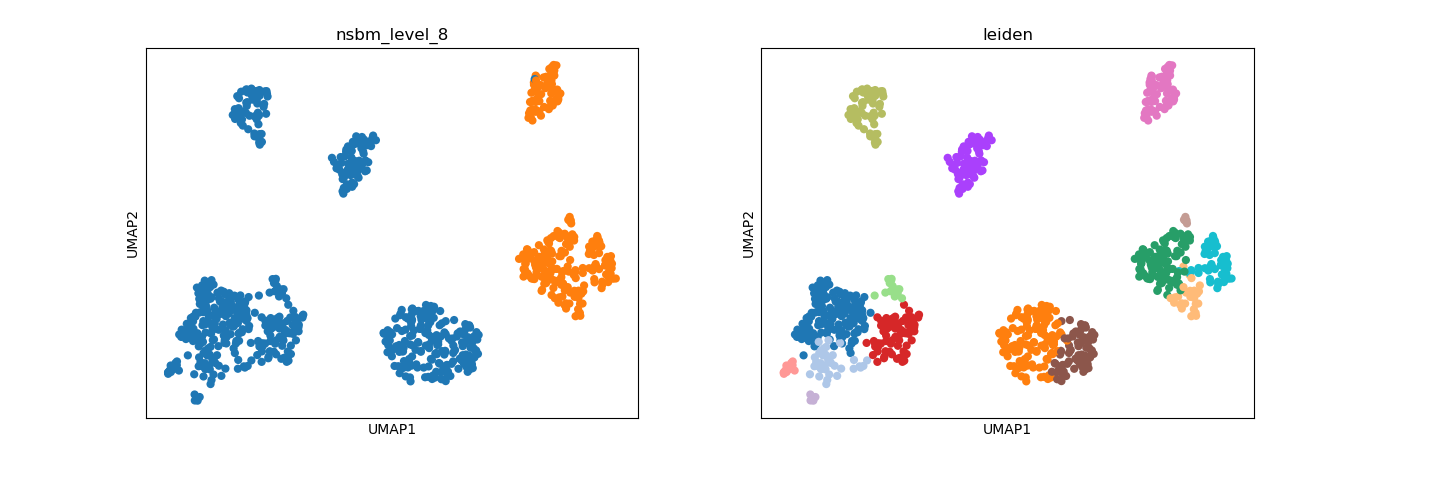

<IPython.core.display.Javascript object>


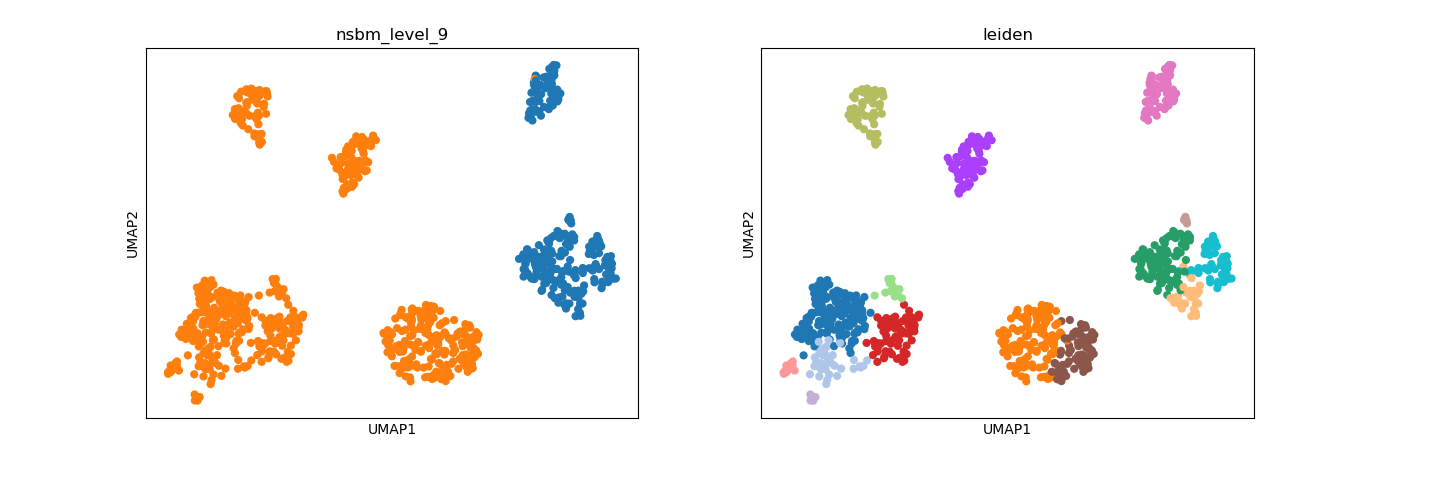

In [53]:
sc.tl.leiden(w_adata5)
sc.pl.umap(w_adata5, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata5, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


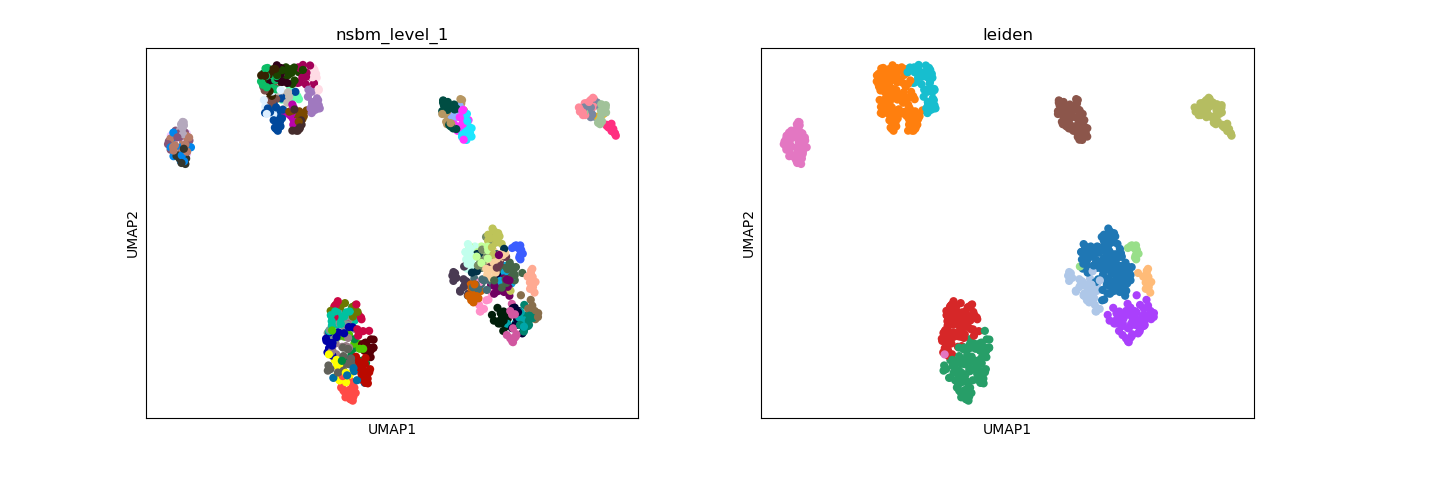

<IPython.core.display.Javascript object>


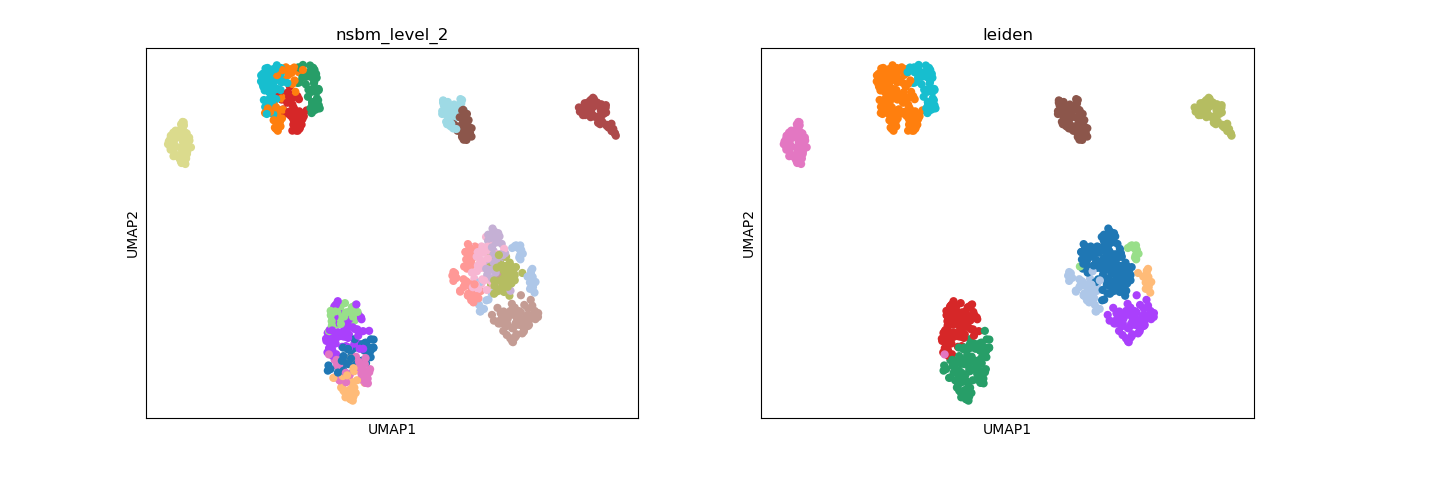

<IPython.core.display.Javascript object>


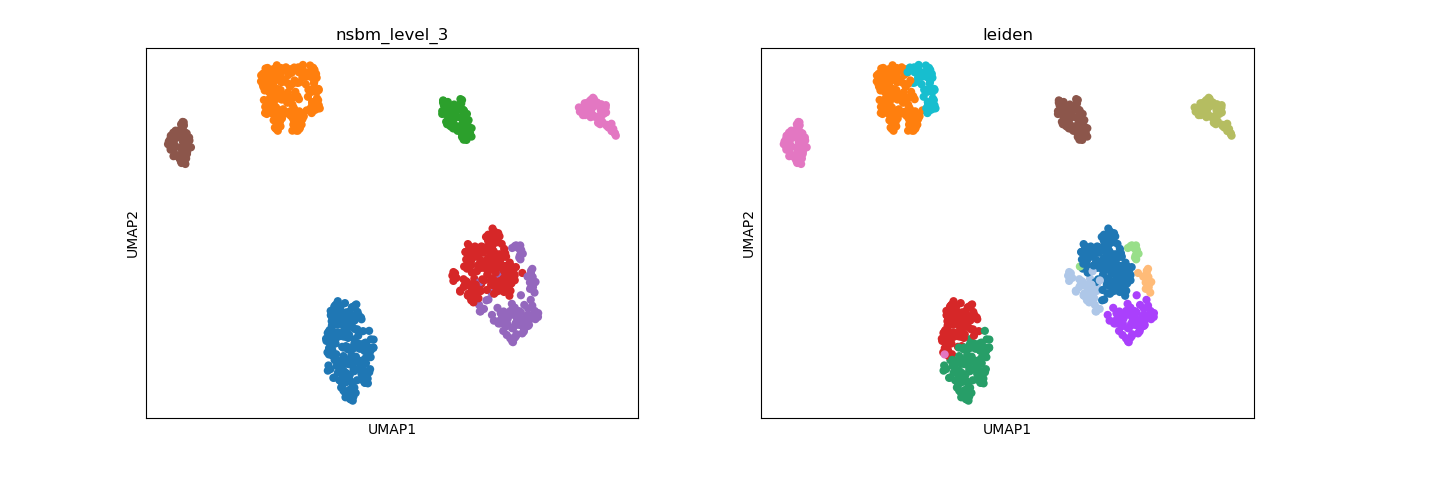

<IPython.core.display.Javascript object>


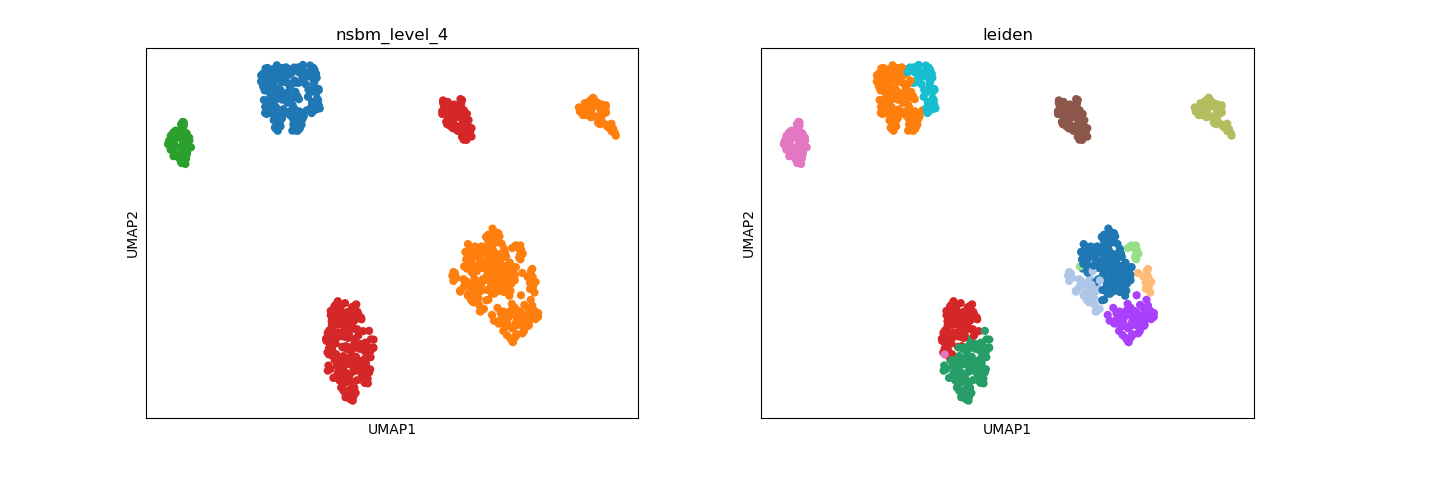

<IPython.core.display.Javascript object>


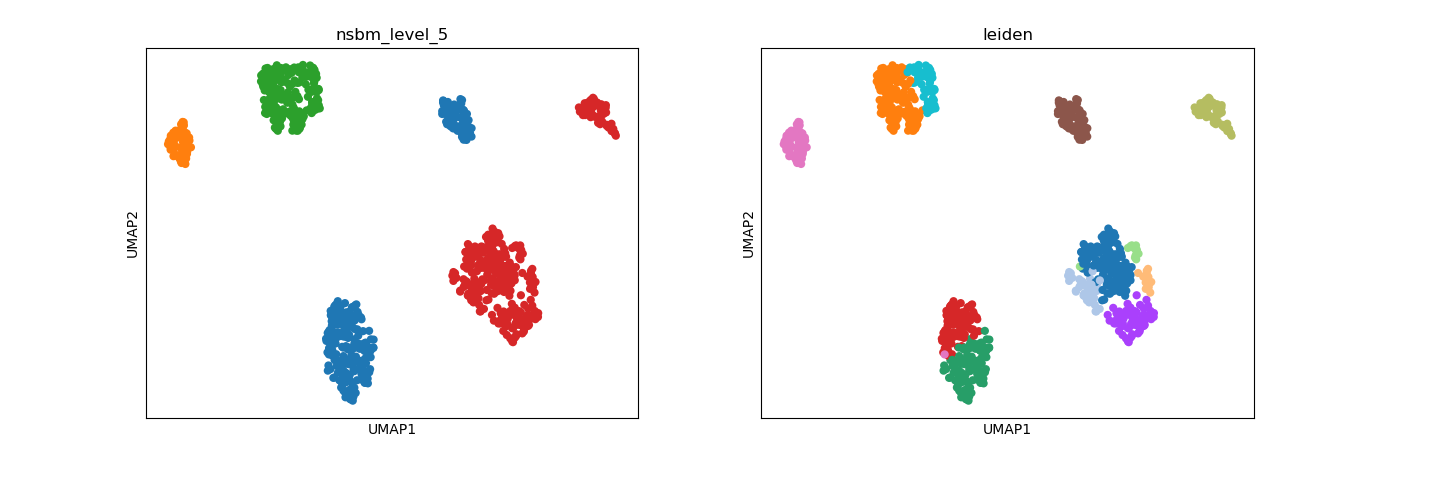

<IPython.core.display.Javascript object>


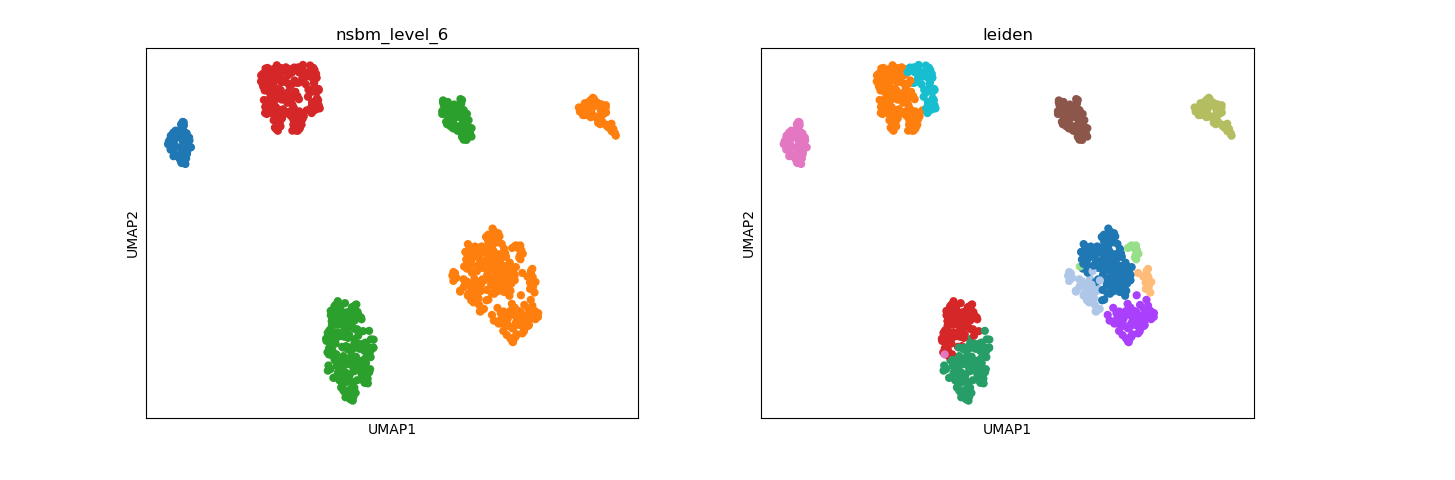

<IPython.core.display.Javascript object>


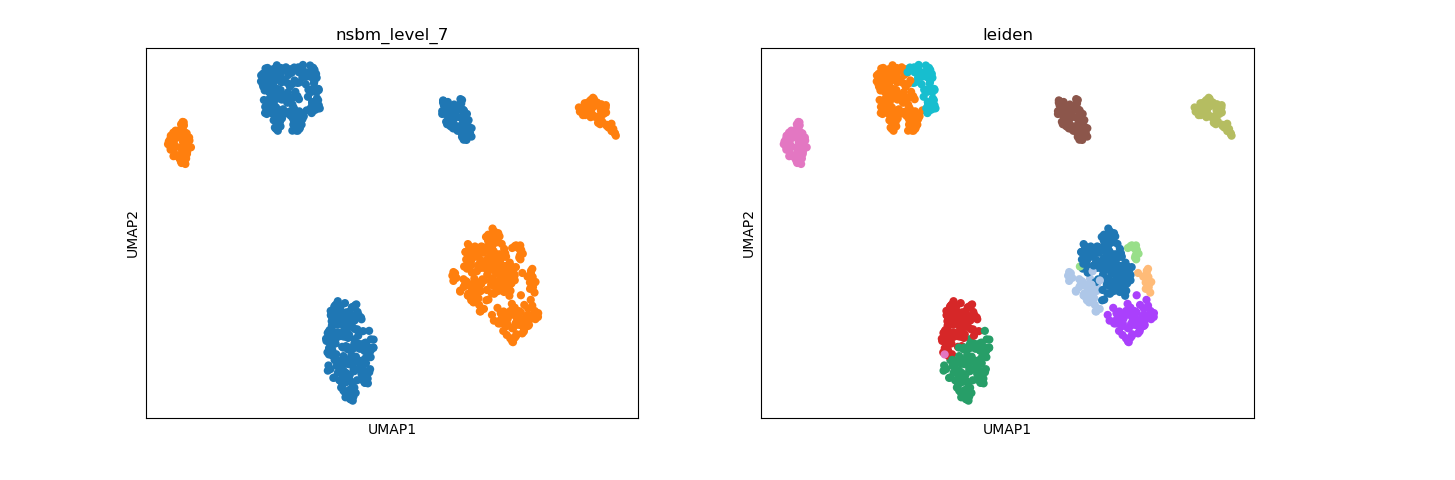

<IPython.core.display.Javascript object>


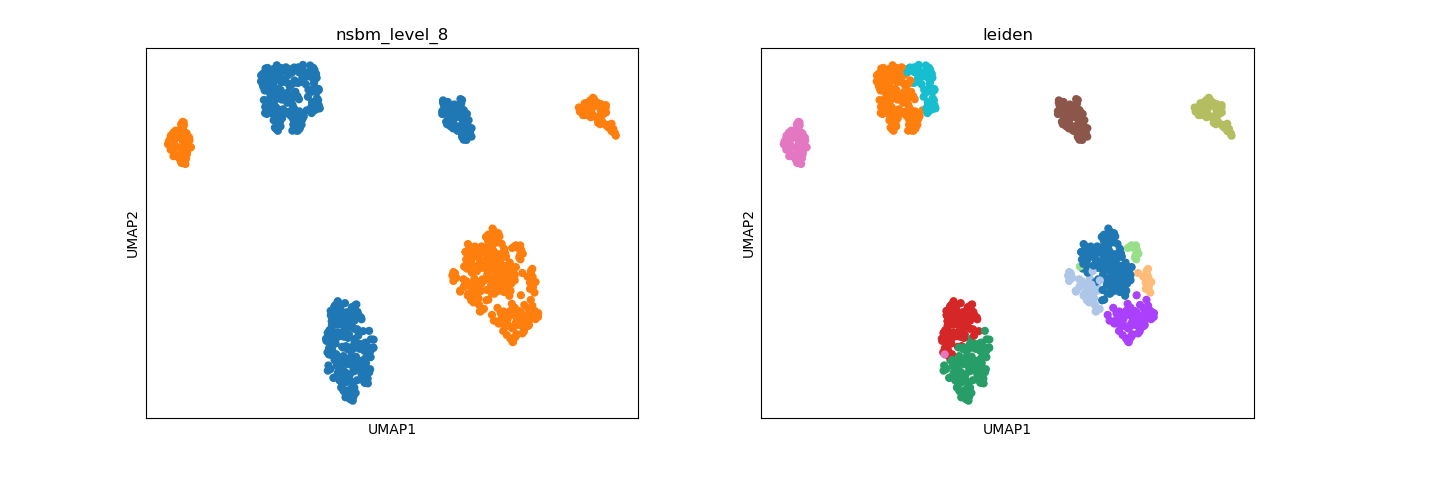

<IPython.core.display.Javascript object>


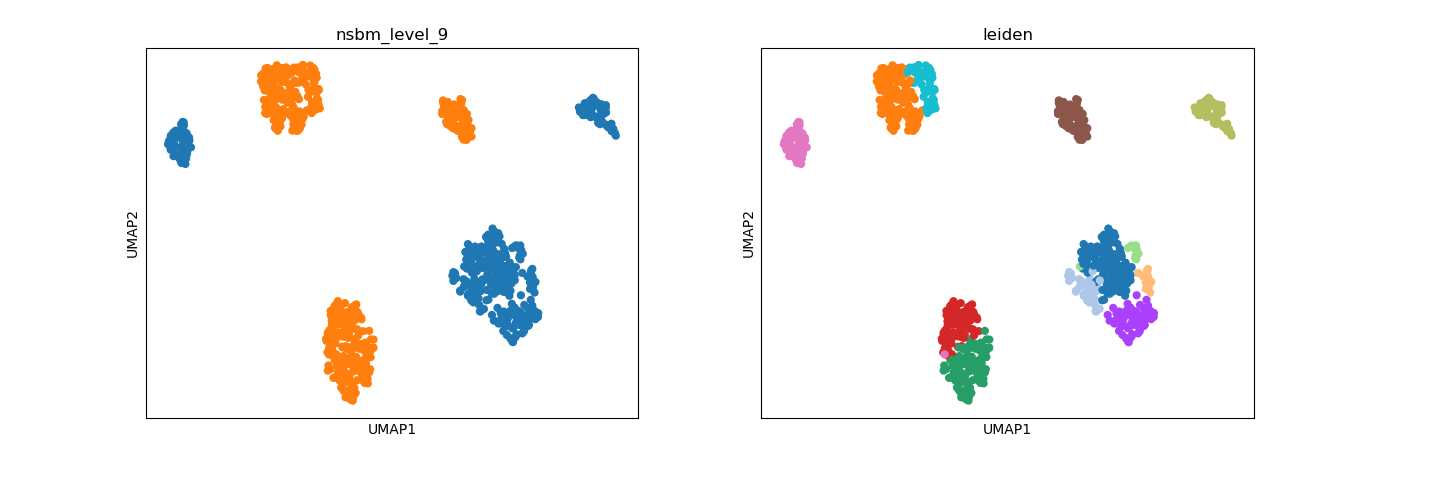

In [55]:
sc.tl.leiden(w_adata10)
sc.pl.umap(w_adata10, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata10, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


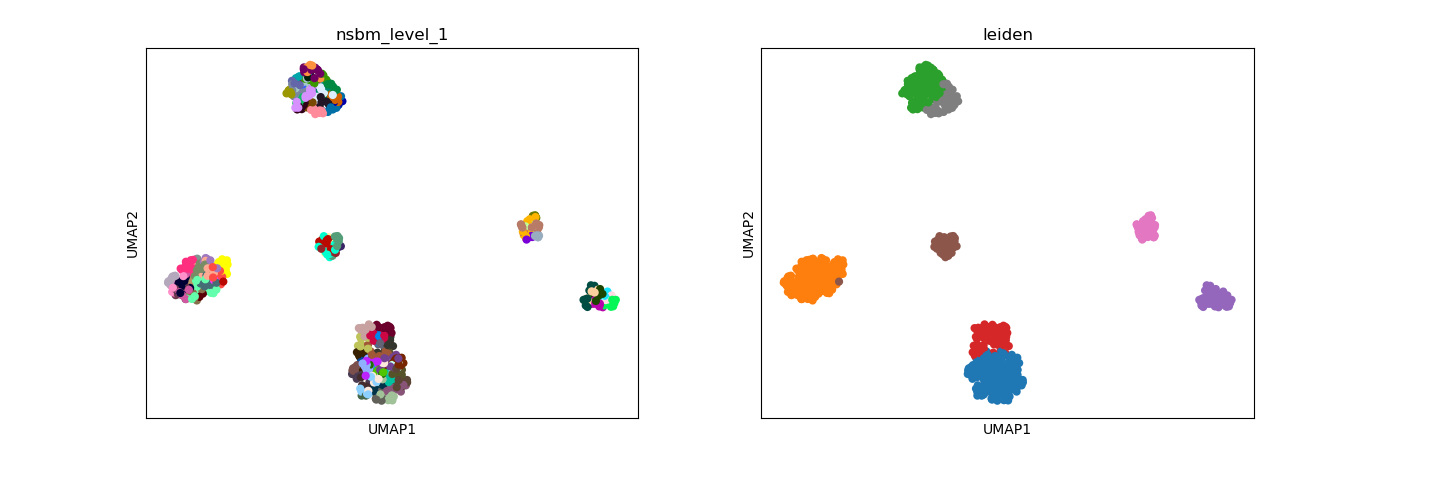

<IPython.core.display.Javascript object>


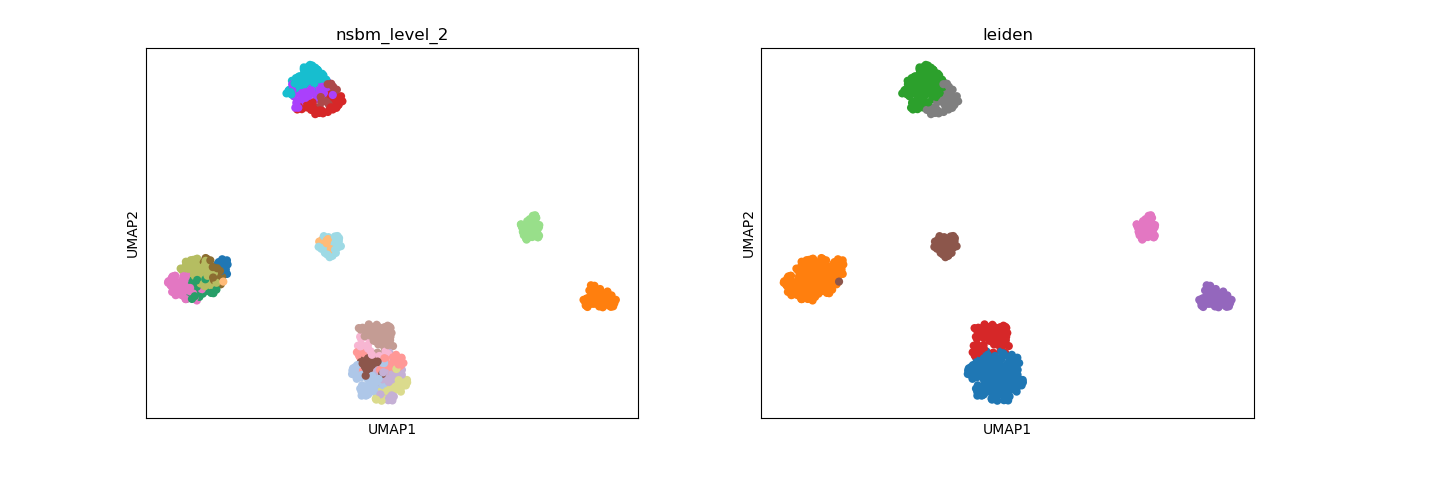

<IPython.core.display.Javascript object>


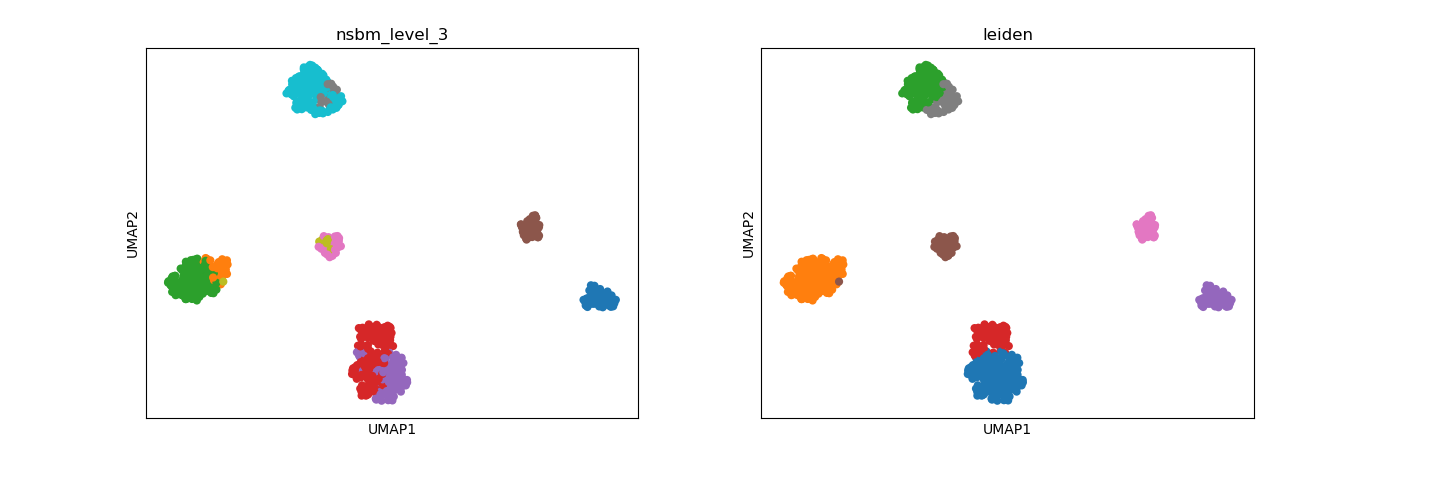

<IPython.core.display.Javascript object>


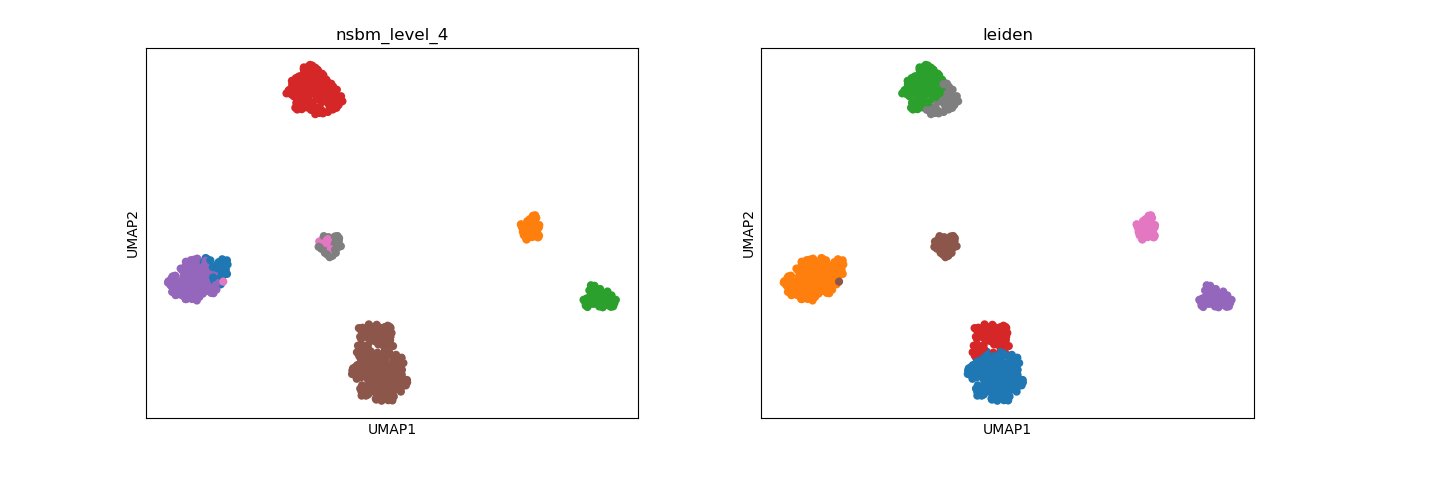

<IPython.core.display.Javascript object>


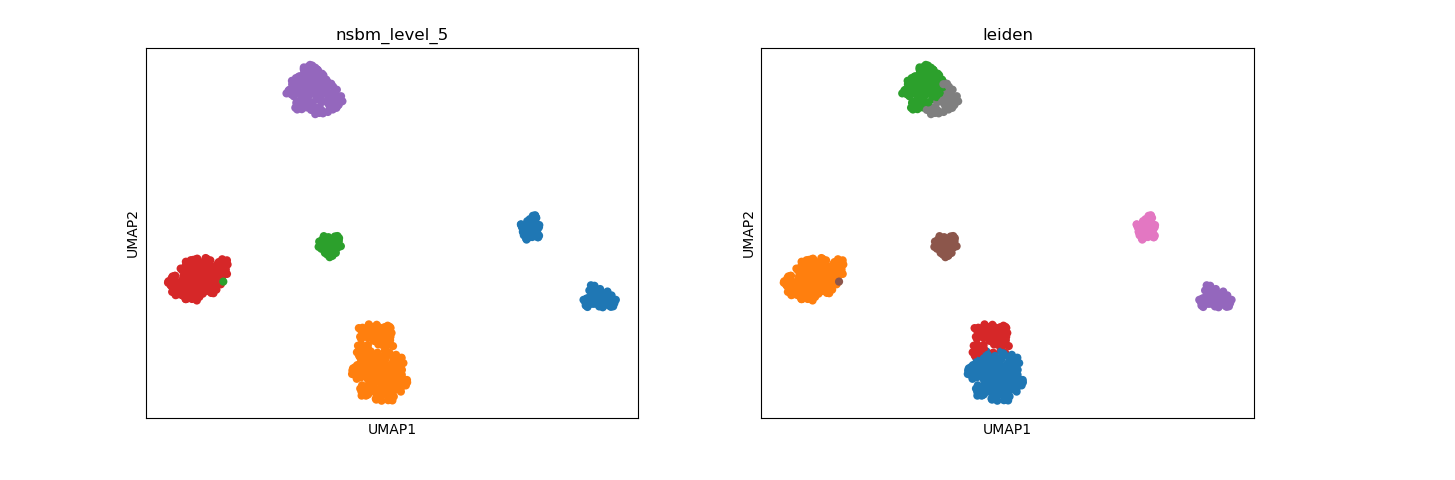

<IPython.core.display.Javascript object>


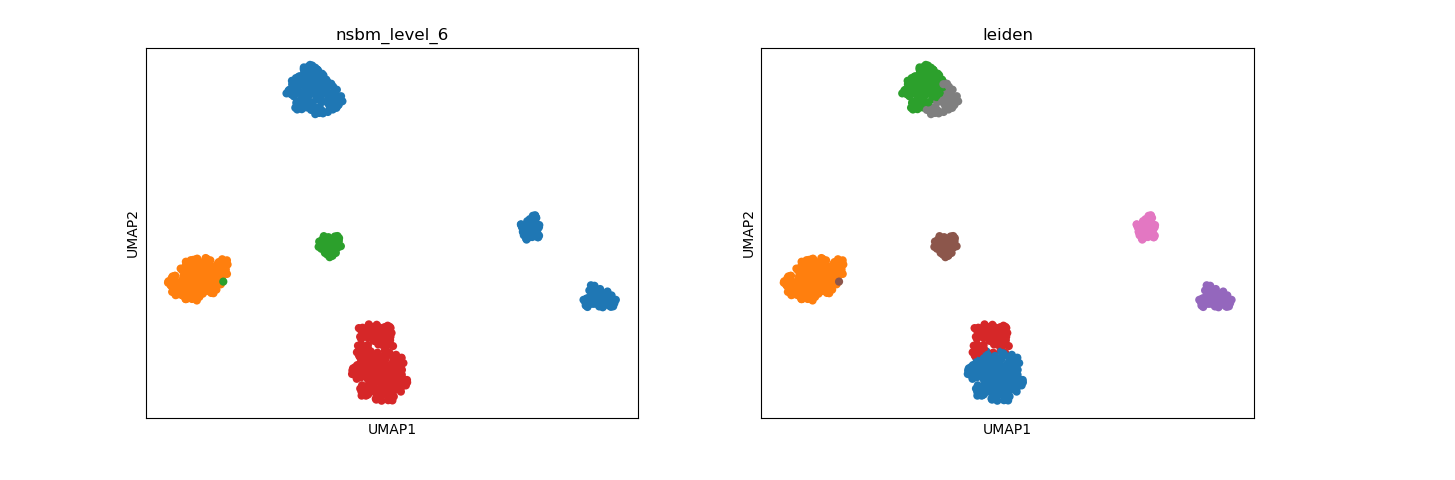

<IPython.core.display.Javascript object>


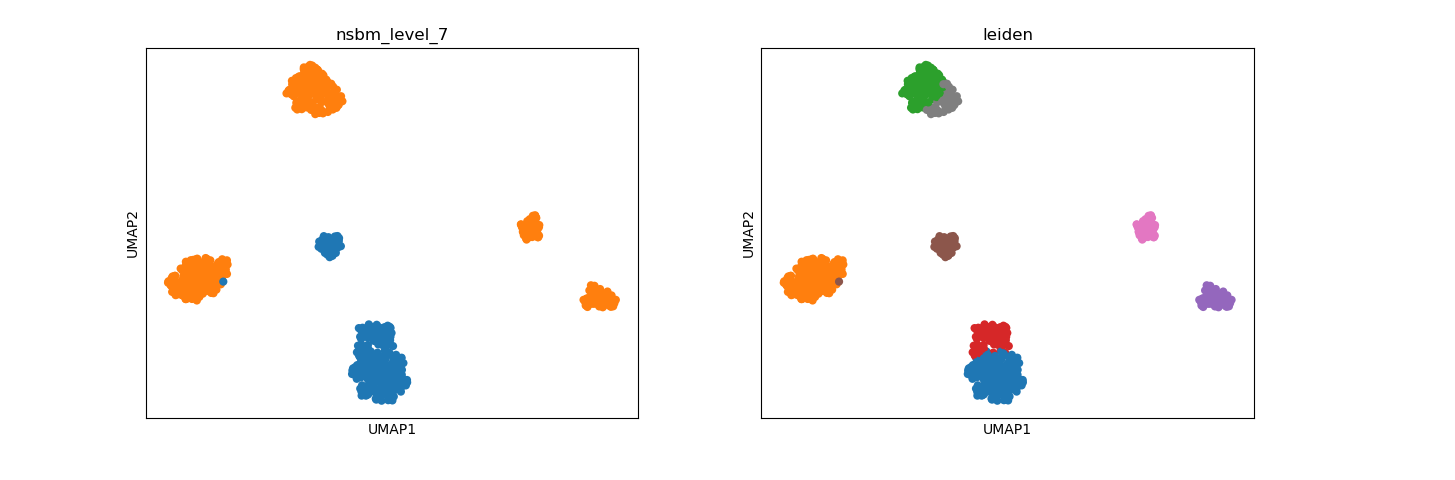

<IPython.core.display.Javascript object>


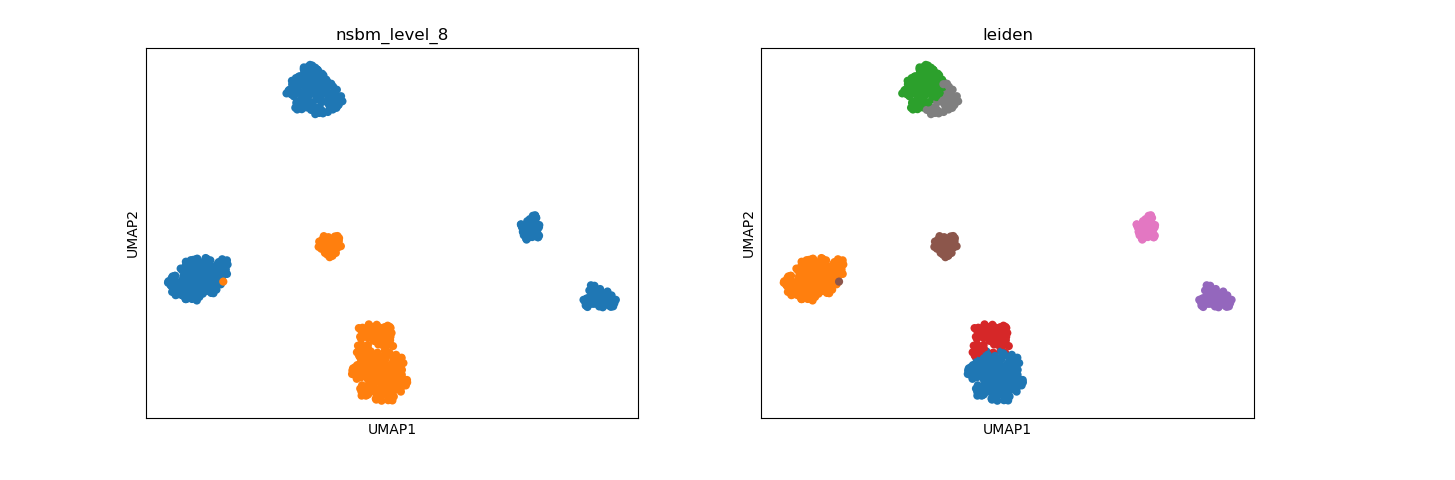

<IPython.core.display.Javascript object>


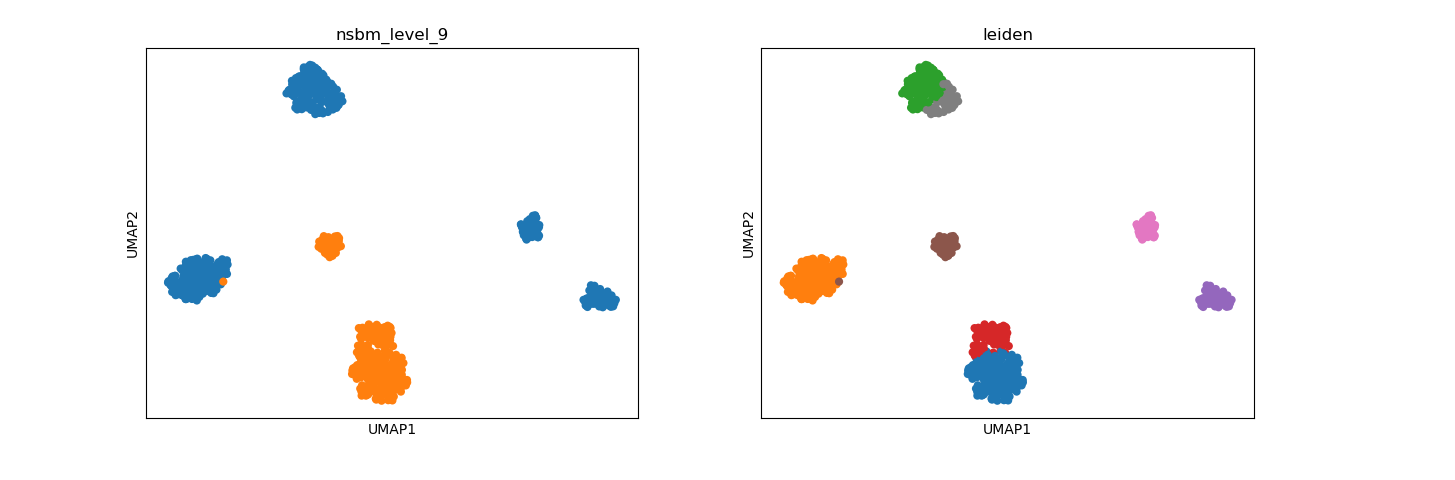

In [56]:
sc.tl.leiden(w_adata20)
sc.pl.umap(w_adata20, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata20, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


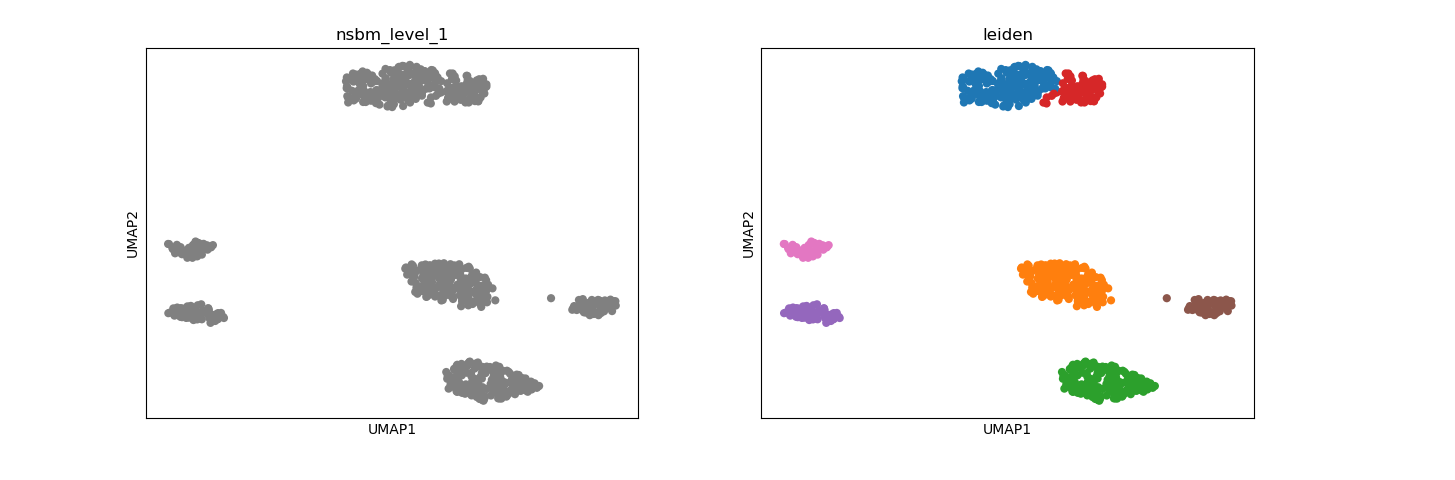

<IPython.core.display.Javascript object>


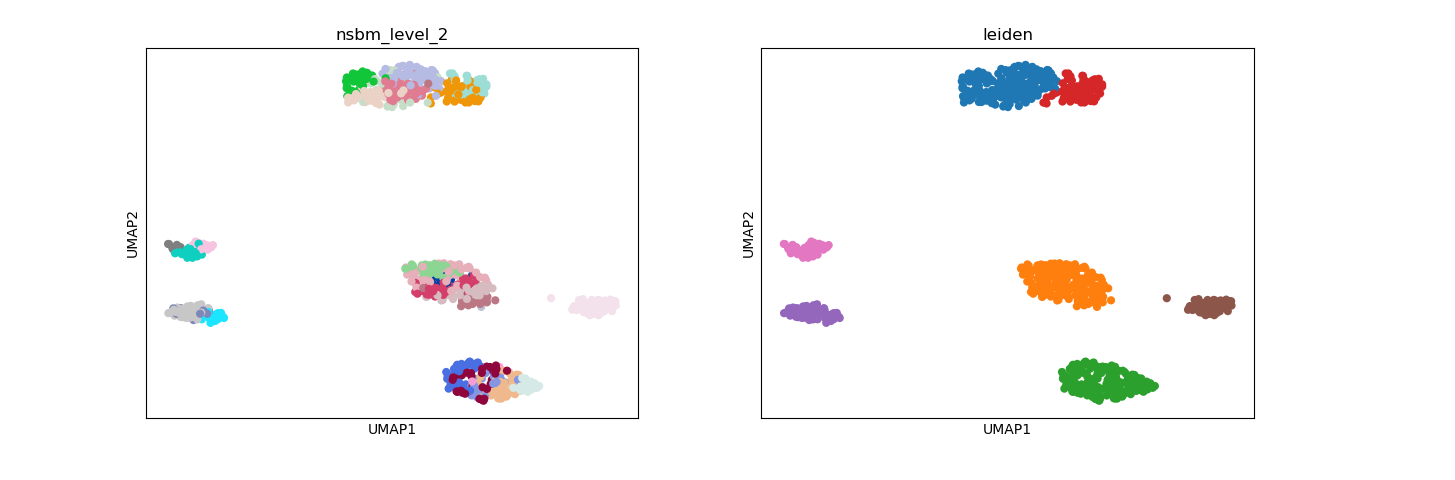

<IPython.core.display.Javascript object>


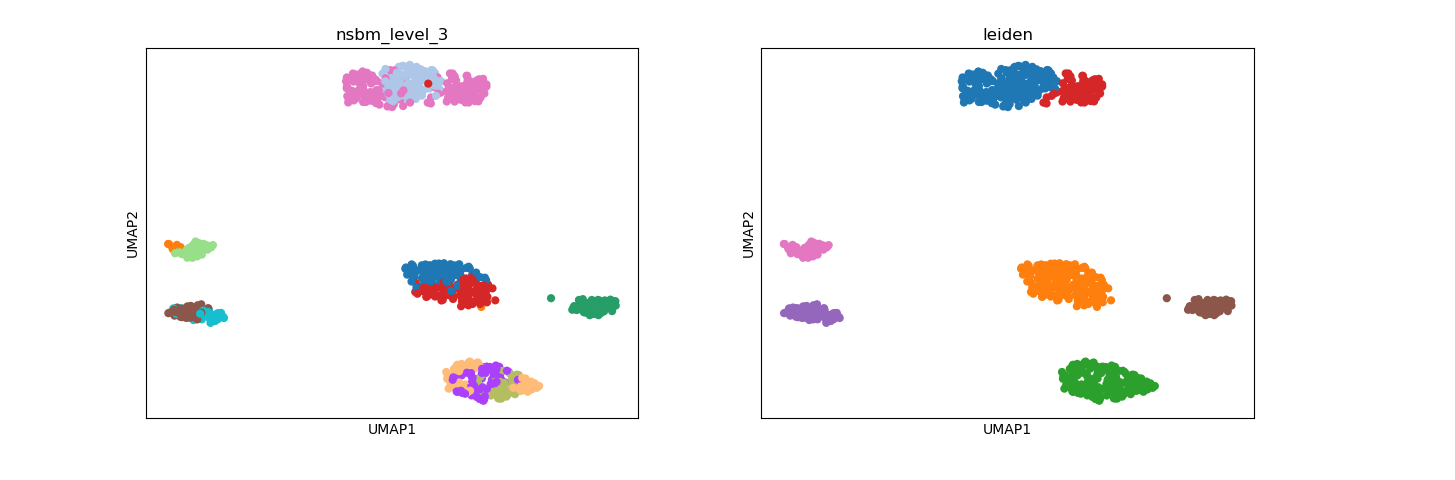

<IPython.core.display.Javascript object>


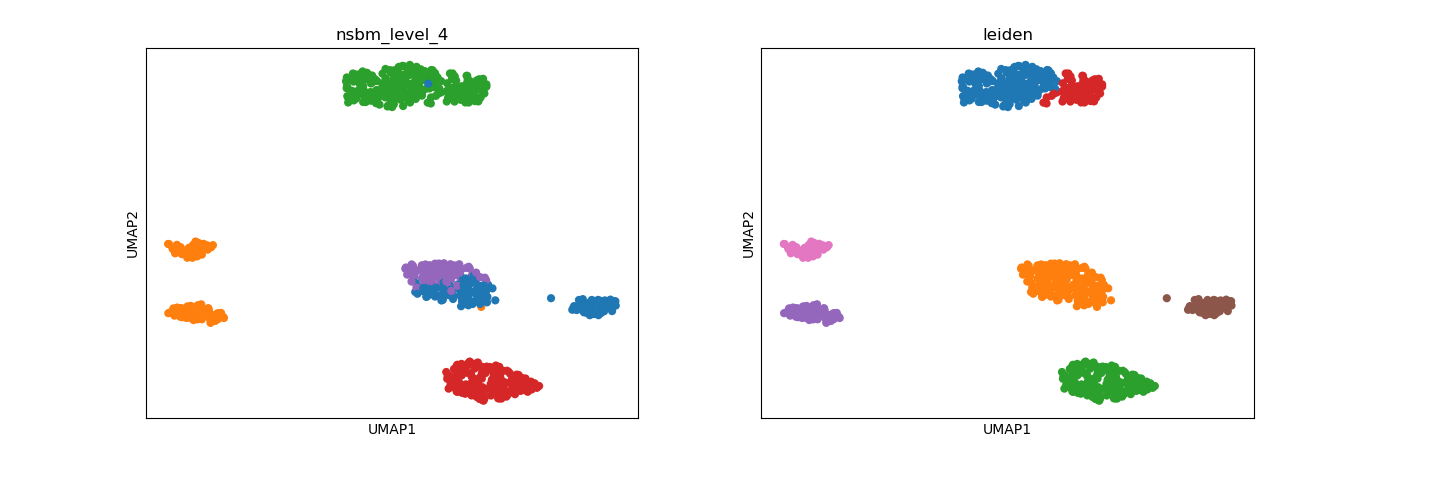

<IPython.core.display.Javascript object>


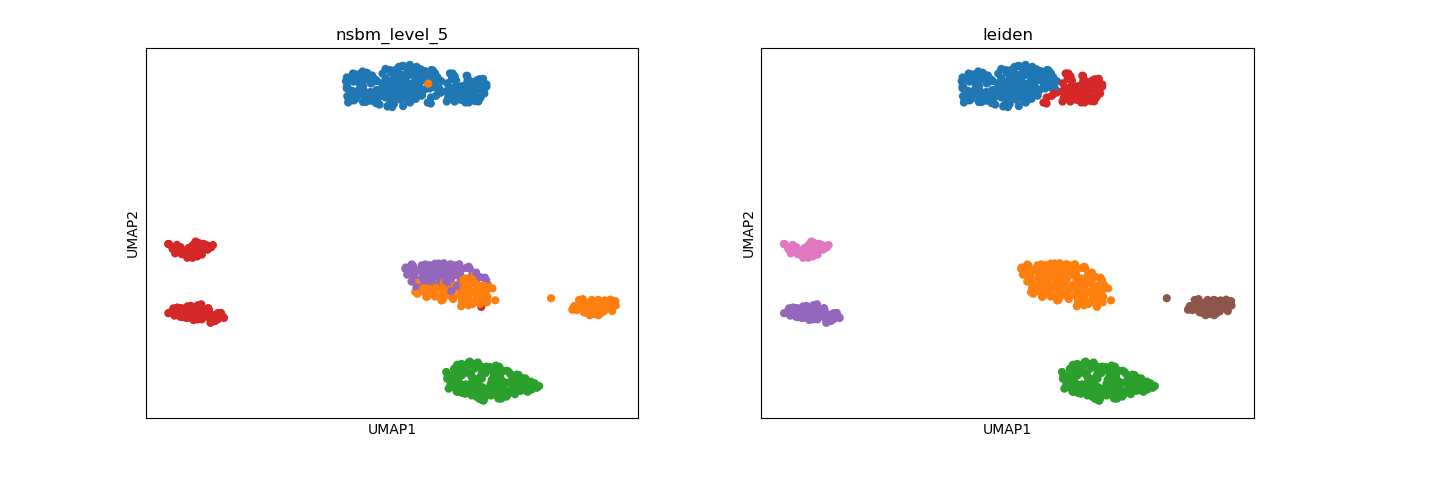

<IPython.core.display.Javascript object>


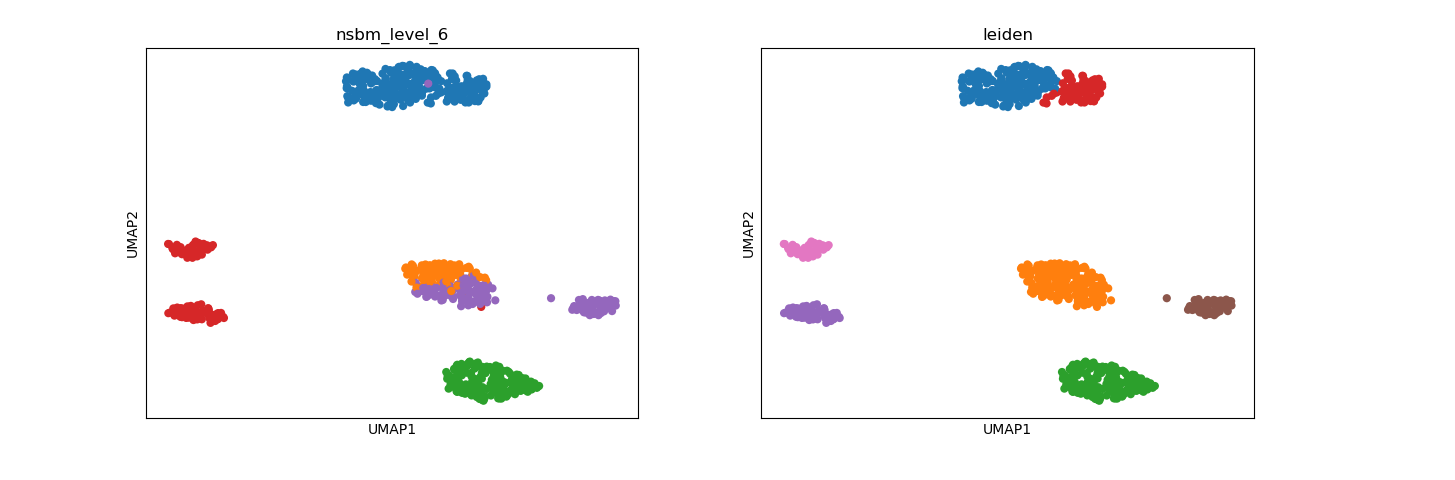

<IPython.core.display.Javascript object>


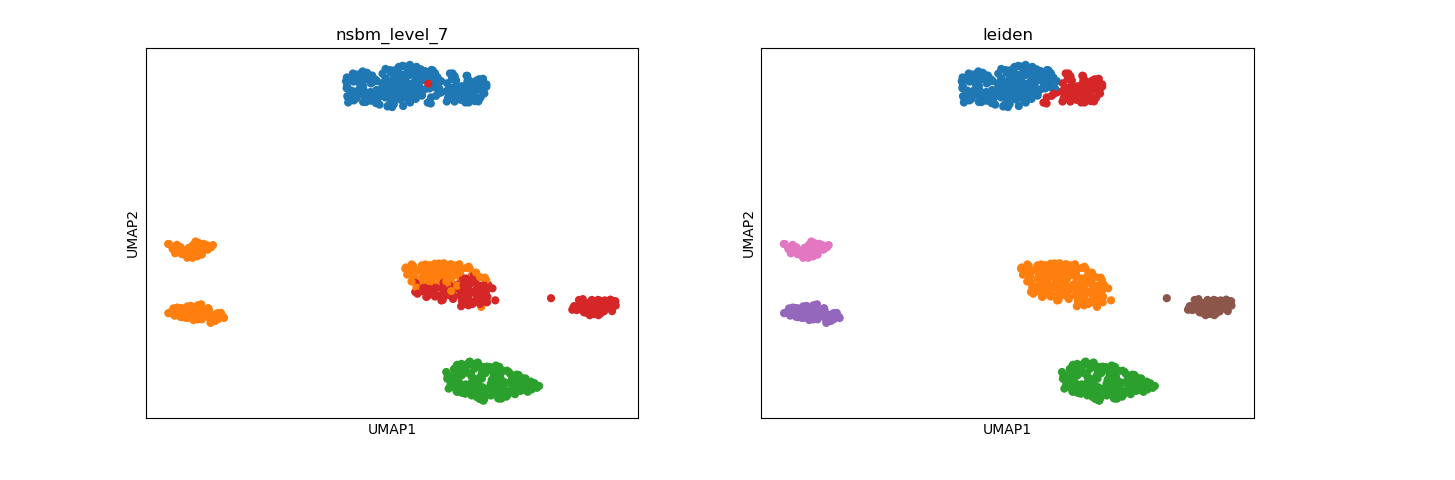

<IPython.core.display.Javascript object>


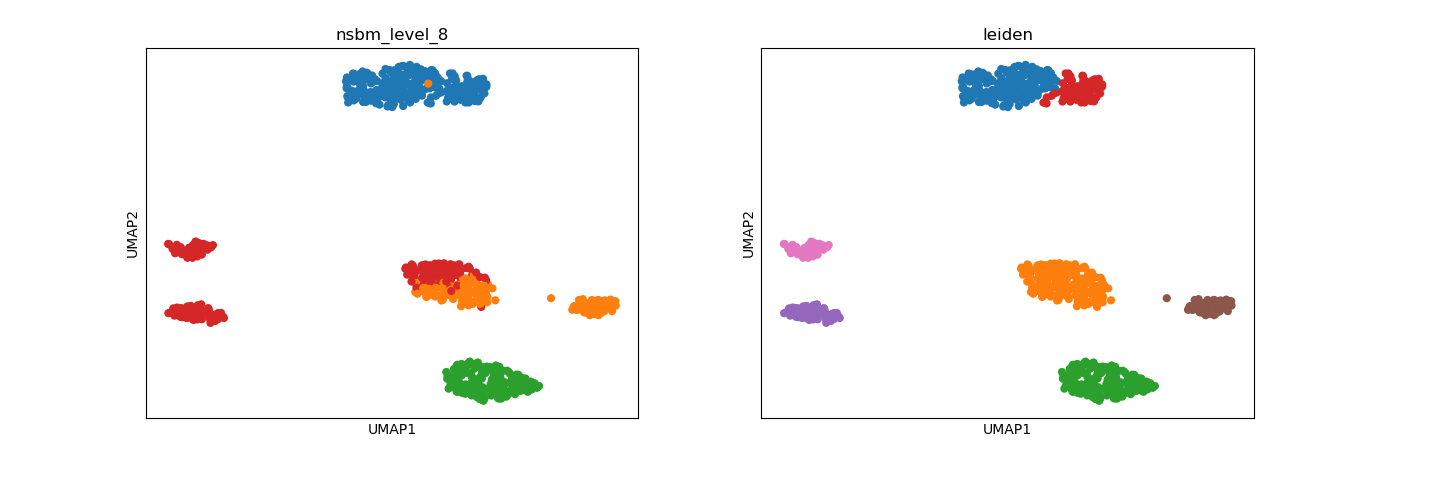

<IPython.core.display.Javascript object>


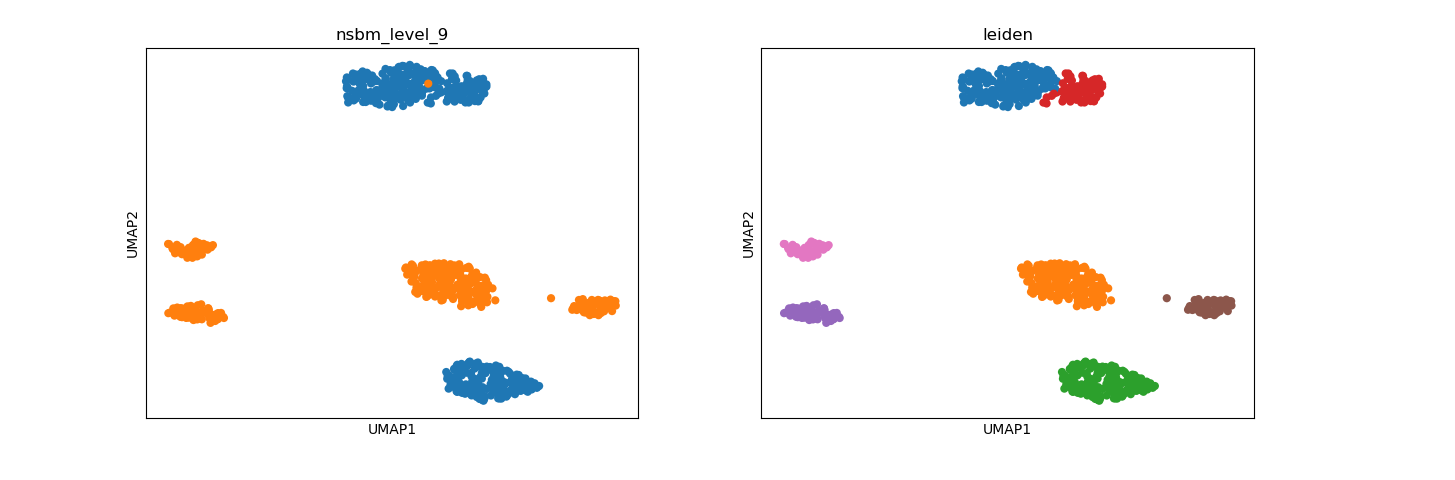

In [54]:
sc.tl.leiden(w_adata50)
sc.pl.umap(w_adata50, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata50, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

<IPython.core.display.Javascript object>


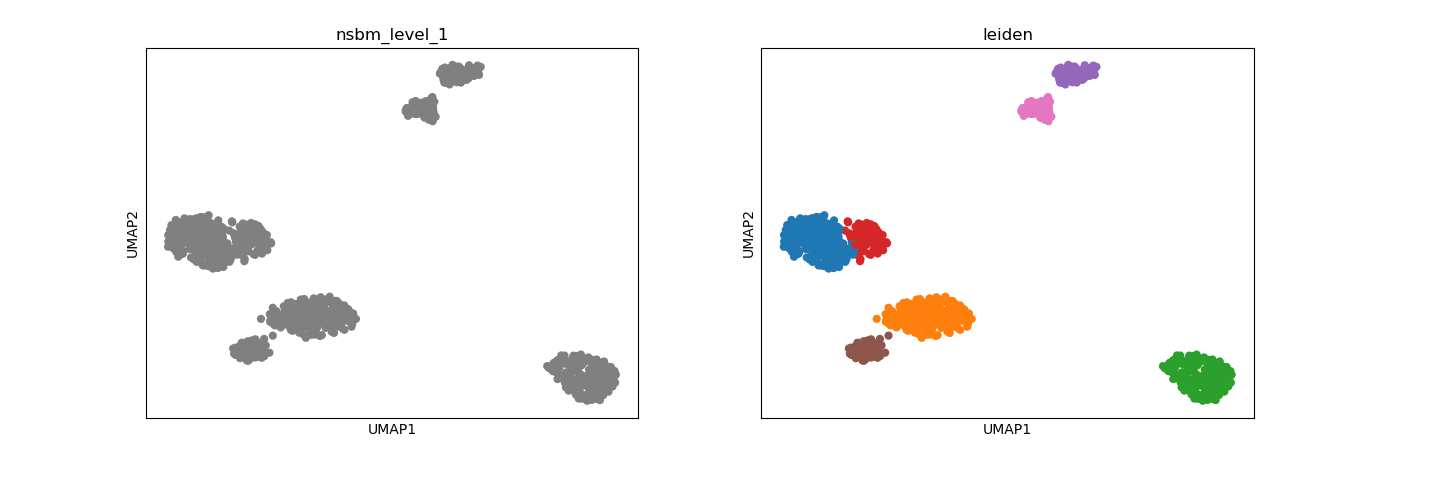

<IPython.core.display.Javascript object>


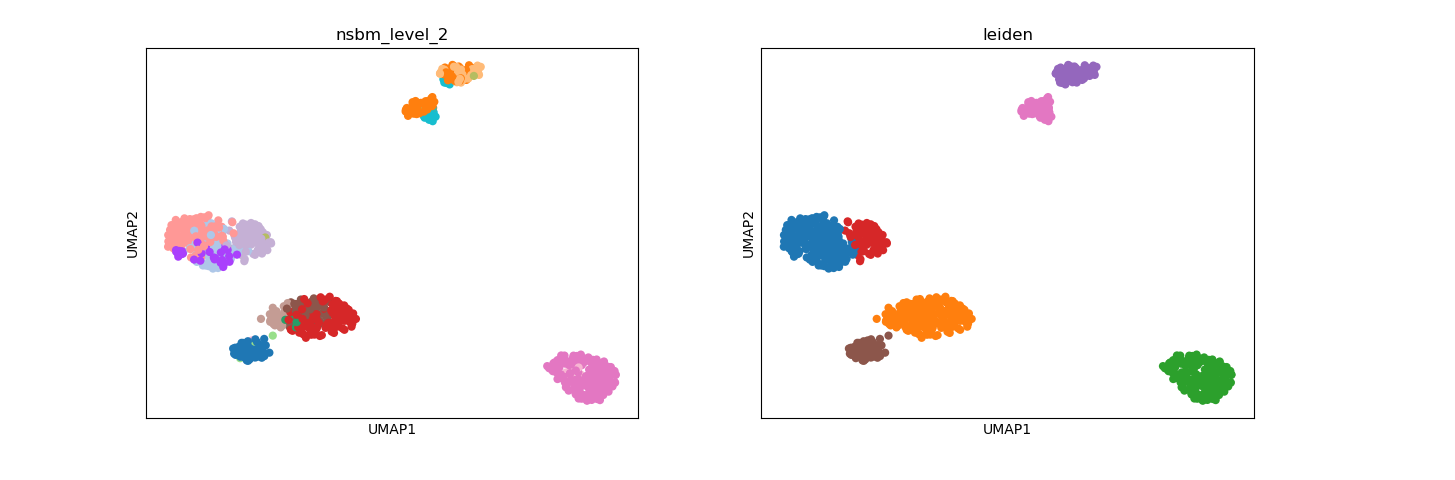

<IPython.core.display.Javascript object>


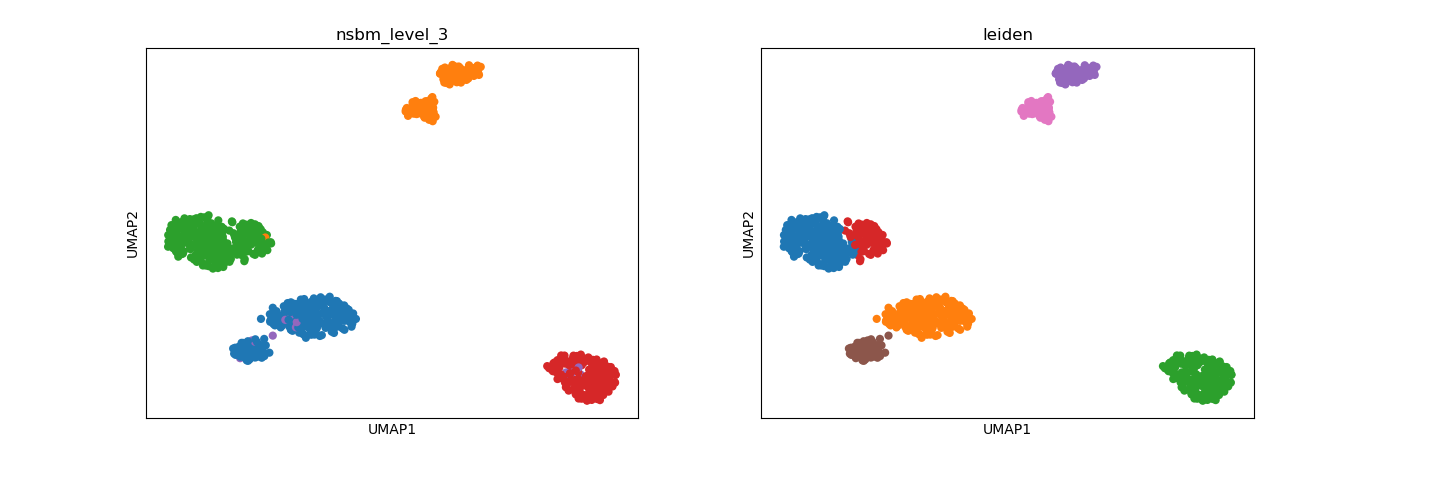

<IPython.core.display.Javascript object>


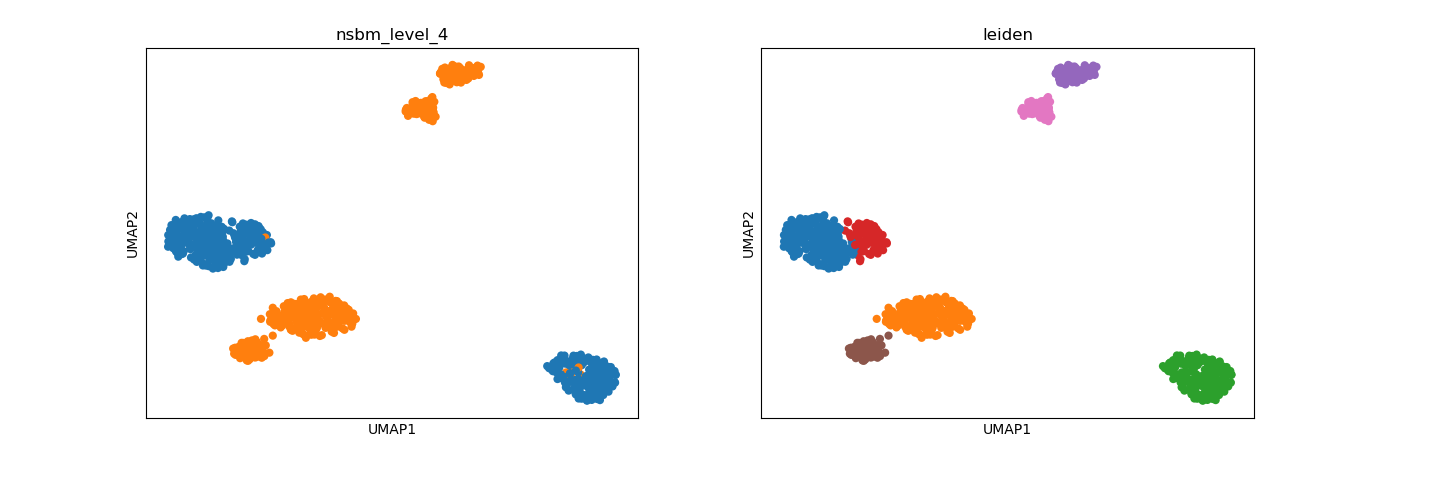

<IPython.core.display.Javascript object>


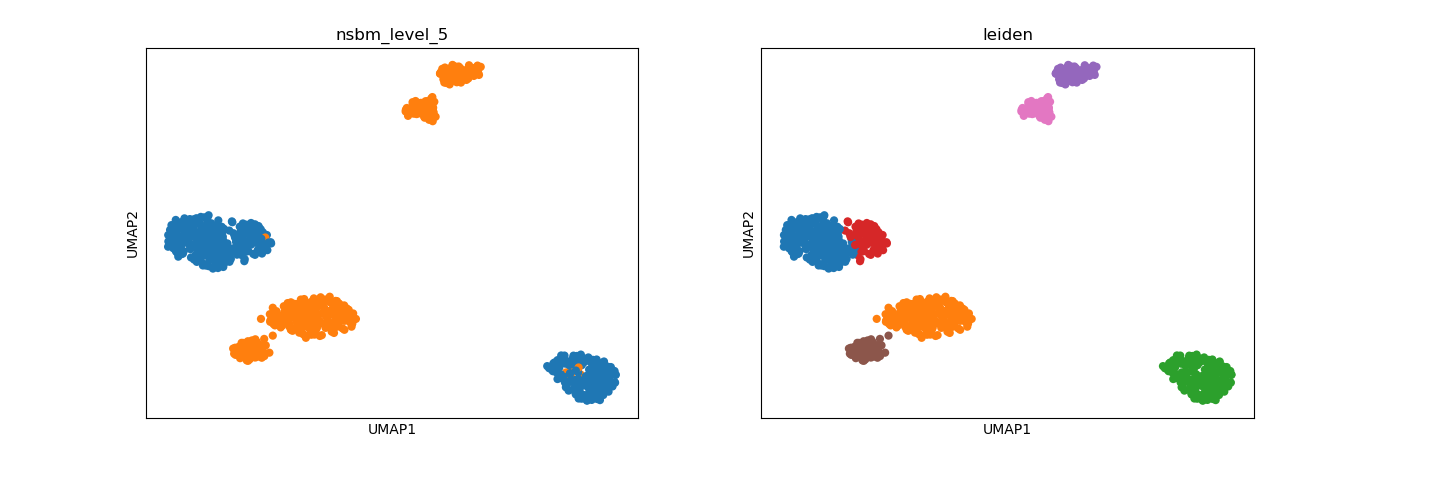

<IPython.core.display.Javascript object>


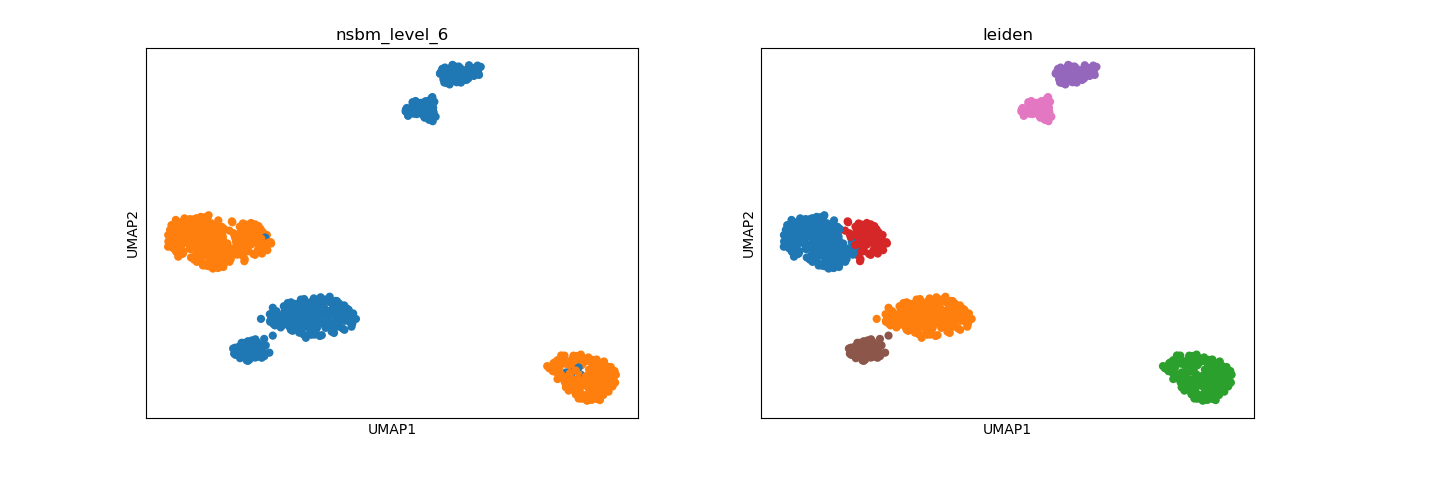

<IPython.core.display.Javascript object>


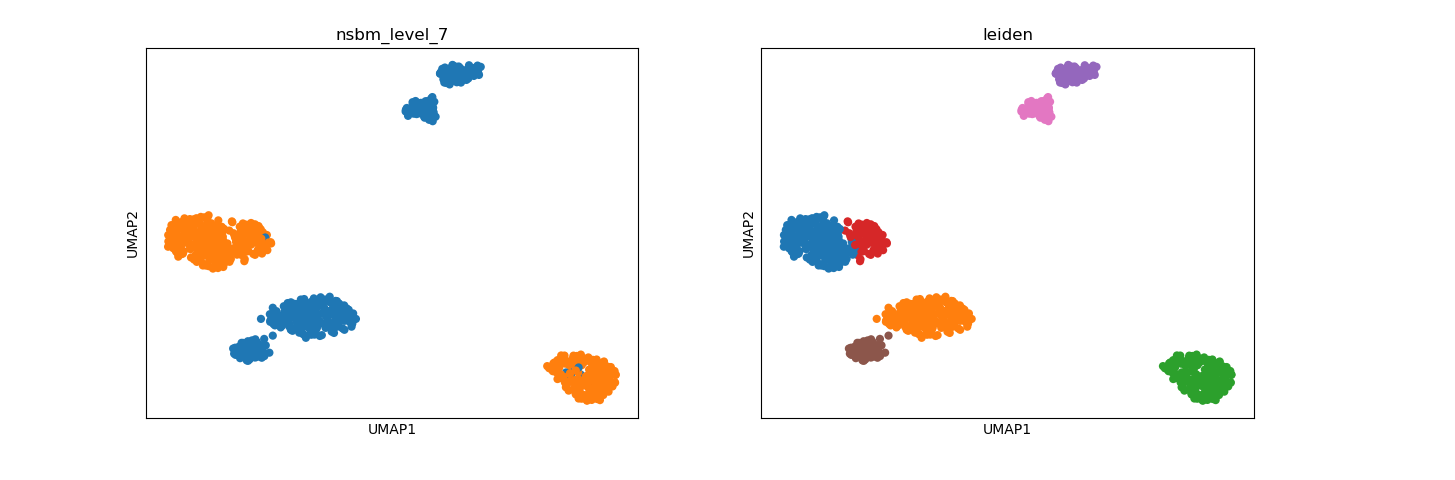

<IPython.core.display.Javascript object>


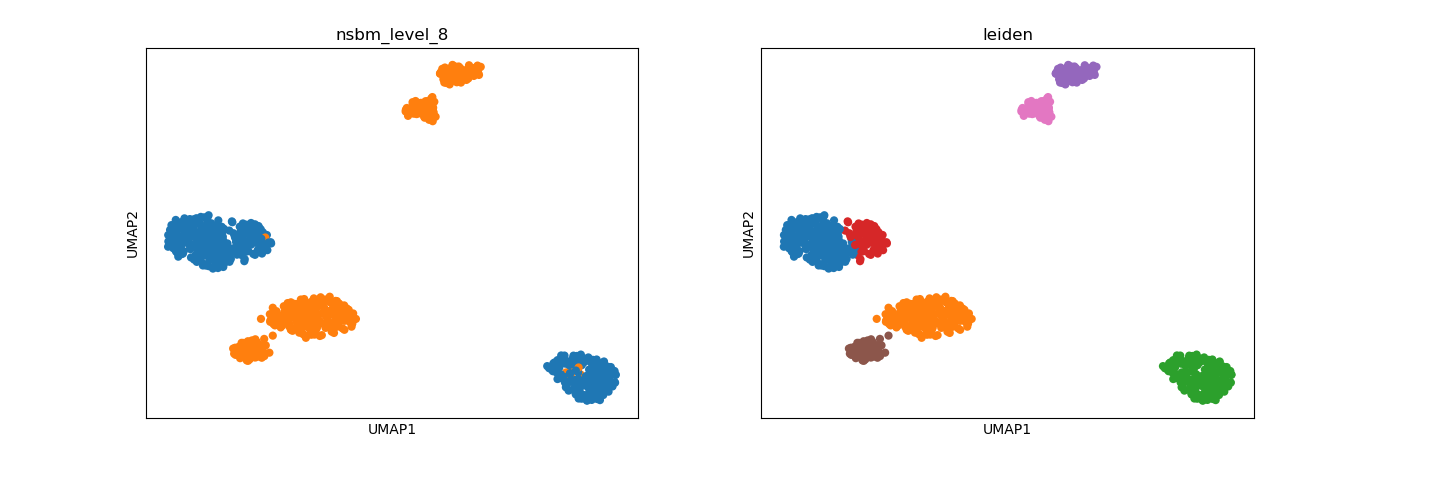

<IPython.core.display.Javascript object>


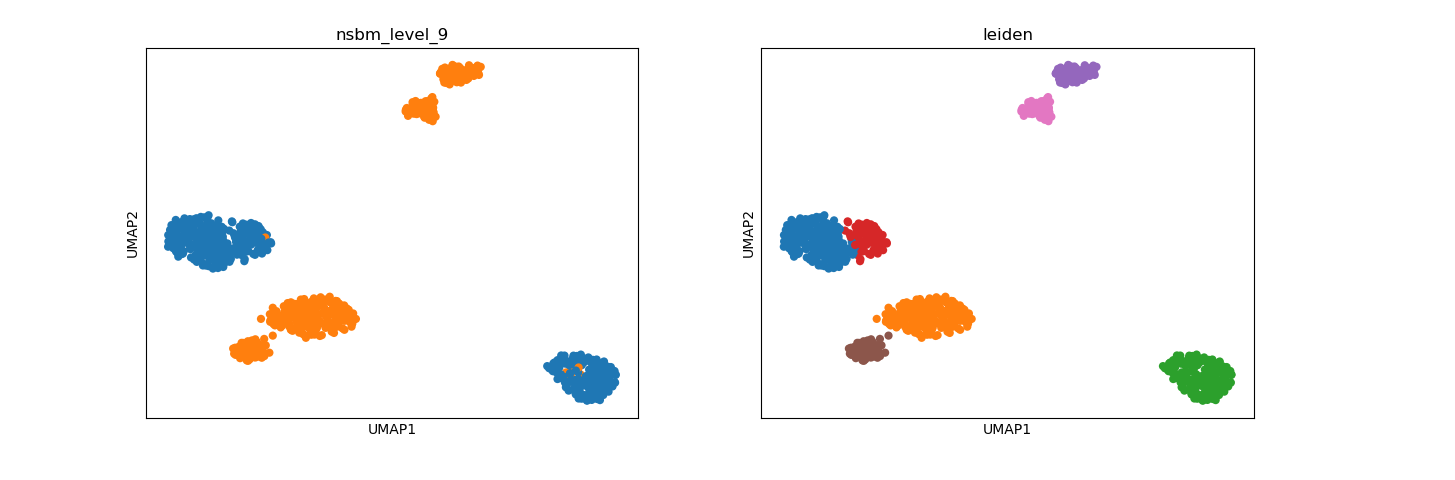

In [52]:
sc.tl.leiden(w_adata100)
sc.pl.umap(w_adata100, color=["nsbm_level_1", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_2", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_3", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_4", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_5", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_6", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_7", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_8", 'leiden'], legend_loc='on_data')
sc.pl.umap(w_adata100, color=["nsbm_level_9", 'leiden'], legend_loc='on_data')

# 3) MI comparison
### 3.1) nsbm Unweighted vs leiden unweighted

In [54]:
type(adata5.uns['nsbm']['state'])

str

In [ ]:
sc.tl.leiden(adata5, resolution=0.025)
sc.pl.umap(adata5, color=['state'])

In [106]:
adata5.obs['nsbm_level_1']

index
Lib90_00004    12
Lib90_00006    13
Lib90_00007    13
Lib90_00012    12
Lib90_00013    12
               ..
Lib90_03981    11
Lib90_04019    24
Lib90_04024     1
Lib90_04048    24
Lib90_04057    11
Name: nsbm_level_1, Length: 860, dtype: category
Categories (25, object): [0, 1, 2, 3, ..., 21, 22, 23, 24]

In [38]:
adata5.uns['leiden']['params']

{'resolution': 0.025, 'random_state': 0, 'n_iterations': -1}

In [4]:
SBM_gruppi=[1,2,3,4,5,6,7,8,9]
resolutions = np.arange(0, 1, 0.005)
leiden_vs_SBM=pd.DataFrame(index=resolutions, columns=SBM_gruppi)

# key error 0 

In [15]:
MI_leiden_NSBM1= [sklearn.metrics.adjusted_mutual_info_score(unw_adata5.obs['nsbm_level_1'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM2= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_2'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM3= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_3'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM4= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_4'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM5= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_5'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM6= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_6'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM7= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_7'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM8= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_8'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM9= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_9'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]

KeyError: 0

In [100]:
MI_leiden_NSBM1= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_1'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM2= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_2'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM3= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_3'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM4= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_4'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM5= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_5'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM6= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_6'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM7= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_7'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM8= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_8'], leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM9= [sklearn.metrics.adjusted_mutual_info_score( adata5.obs['nsbm_level_9'], leiden_clusters5.loc[:,x]) for x in resolutions]

KeyError: 0

In [103]:
def mutual_information(variables, k=1):
    '''
    Returns the mutual information between any number of variables.
    Each variable is a matrix X = array(n_samples, n_features)
    where
      n = number of samples
      dx,dy = number of dimensions
    Optionally, the following keyword argument can be specified:
      k = number of nearest neighbors for density estimation
    Example: mutual_information((X, Y)), mutual_information((X, Y, Z), k=5)
    '''
    if len(variables) < 2:
        raise AttributeError(
                "Mutual information must involve at least 2 variables")
    all_vars = np.hstack(variables)
    return (sum([entropy(X, k=k) for X in variables])
            - entropy(all_vars, k=k))

In [9]:
MI_leiden_NSBM1= [mutual_information( adata5.obs['nsbm_level_1'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM2= [mutual_information( adata5.obs['nsbm_level_2'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM3= [mutual_information( adata5.obs['nsbm_level_3'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM4= [mutual_information( adata5.obs['nsbm_level_4'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM5= [mutual_information( adata5.obs['nsbm_level_5'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM6= [mutual_information( adata5.obs['nsbm_level_6'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM7= [mutual_information( adata5.obs['nsbm_level_7'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM8= [mutual_information( adata5.obs['nsbm_level_8'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]
MI_leiden_NSBM9= [mutual_information( adata5.obs['nsbm_level_9'], unw_leiden_clusters5.loc[:,x]) for x in resolutions]

NameError: name 'mutual_information' is not defined

In [111]:
MI_leiden_NSBM1= [mutual_information( adata5.obs['nsbm_level_1'][:], leiden_clusters5.loc[:,x]) for x in resolutions]


KeyError: 0

In [101]:
leiden_clusters5

index  0.0  0.005  0.01  0.015  0.02  0.025  0.03  0.035  0.04  \
0    Lib90_00004    0      0     2      2     2      2     2      2     2   
1    Lib90_00006    2      2     3      3     3      3     3      3     3   
2    Lib90_00007    2      2     3      3     3      3     3      3     3   
3    Lib90_00012    0      0     2      2     2      2     2      2     2   
4    Lib90_00013    0      0     2      2     2      2     2      2     2   
..           ...  ...    ...   ...    ...   ...    ...   ...    ...   ...   
855  Lib90_03981    0      0     1      1     1      1     1      1     1   
856  Lib90_04019    0      0     1      1     1      1     1      1     1   
857  Lib90_04024    1      1     0      0     0      0     0      0     0   
858  Lib90_04048    0      0     1      1     1      1     1      1     1   
859  Lib90_04057    0      0     1      1     1      1     1      1     1   

     ...  0.9500000000000001  0.9550000000000001  0.96  0.965  0.97  0.975  \
0    ...                   3                   3     3      3     3      3   
1    ...                   4                   4     4      4     4      4   
2    ...                   4                   4     4      4     4      4   
3    ...                   3                   3     3      3     3      3   
4    ...                   3                   3     3      3     3      3   
..   ...                 ...                 ...   ...    ...   ...    ...   
855  ...                   1                   1     1      1     1      1   
856  ...                   6                   6     6      6     6      6   
857  ...                   0                   0     0      0     0      0   
858  ...                   6                   6     6      6     6      6   
859  ...                   1                   1     1      1     1      1   

     0.98  0.985  0.99  0.995  
0       3      3     3      3  
1       4      4     4      4  
2       4      4     4      4  
3       3      3     3      3  
4       3      3     3      3  
..    ...    ...   ...    ...  
855    10     10    10     10  
856     6      6     6      6  
857     0      0     0      0  
858     6      6     6      6  
859    10     10    10     10  

[860 rows x 201 columns]

In [98]:
leiden_vs_SBM.loc[:,1]=MI_leiden_NSBM1
leiden_vs_SBM.loc[:,2]=MI_leiden_NSBM2
leiden_vs_SBM.loc[:,3]=MI_leiden_NSBM3
leiden_vs_SBM.loc[:,4]=MI_leiden_NSBM4
leiden_vs_SBM.loc[:,5]=MI_leiden_NSBM5
leiden_vs_SBM.loc[:,6]=MI_leiden_NSBM6
leiden_vs_SBM.loc[:,7]=MI_leiden_NSBM7
leiden_vs_SBM.loc[:,8]=MI_leiden_NSBM8
leiden_vs_SBM.loc[:,9]=MI_leiden_NSBM9

NameError: name 'MI_leiden_NSBM1' is not defined

In [ ]:
leiden_vs_SBM.head()

In [ ]:
leiden_vs_SBM.to_csv('adata_10x/10x_mi_leiden_nsbm.csv')

### 3.2) nsbm weighted vs leiden weighted

### 3.3) nsbm weighted vs leiden unweighted

### 3.4 nsbm unweighted vs leiden weighted